***
# Supervised Learning : Leveraging Ensemble Learning With Bagging, Boosting, Stacking and Blending Approaches

***
### [**John Pauline Pineda**](https://github.com/JohnPaulinePineda) <br> <br> *March 1, 2025*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Splitting](#1.4.1)
        * [1.4.2 Data Profiling](#1.4.2)
        * [1.4.3 Category Aggregation and Encoding](#1.4.3)
        * [1.4.4 Missing Data Imputation](#1.4.4)
        * [1.4.5 Outlier and Distributional Shape Analysis](#1.4.5)
        * [1.4.6 Collinearity](#1.4.6)
        * [1.4.7 Preprocessed Data Description](#1.4.7)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Premodelling Data Preparation](#1.6)
        * [1.6.1 Preprocessing Pipeline Development](#1.6.1)
        * [1.6.2 Premodelling Data Description](#1.6.2)
    * [1.7 Bagged Model Development](#1.7)
        * [1.7.1 Random Forest](#1.7.1)
        * [1.7.2 Extra Trees](#1.7.2)
        * [1.7.3 Bagged Decision Tree](#1.7.3)
        * [1.7.4 Bagged Logistic Regression](#1.7.4)
        * [1.7.5 Bagged Support Vector Machine](#1.7.5)
    * [1.8 Boosted Model Development](#1.8)
        * [1.8.1 AdaBoost](#1.8.1)
        * [1.8.2 Gradient Boosting](#1.8.2)
        * [1.8.3 XGBoost](#1.8.3)
        * [1.8.4 Light GBM](#1.8.4)
        * [1.8.5 CatBoost](#1.8.5)
    * [1.9 Stacked Model Development](#1.9)
        * [1.9.1 Base Learner - K-Nearest Neighbors](#1.9.1)
        * [1.9.2 Base Learner - Support Vector Machine](#1.9.2)
        * [1.9.3 Base Learner - Ridge Classifier](#1.9.3)
        * [1.9.4 Base Learner - Neural Network](#1.9.4)
        * [1.9.5 Base Learner - Decision Tree](#1.9.5)
        * [1.9.6 Meta Learner - Logistic Regression](#1.9.6)
    * [1.10 Blended Model Development](#1.10)
        * [1.10.1 Base Learner - K-Nearest Neighbors](#1.10.1)
        * [1.10.2 Base Learner - Support Vector Machine](#1.10.2)
        * [1.10.3 Base Learner - Ridge Classifier](#1.10.3)
        * [1.10.4 Base Learner - Neural Network](#1.10.4)
        * [1.10.5 Base Learner - Decision Tree](#1.10.5)
        * [1.10.6 Meta Learner - Logistic Regression](#1.10.6)
    * [1.11 Consolidated Findings](#1.11)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***


# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project explores different **Ensemble Learning** approaches which combine the predictions from multiple models in an effort to achieve better predictive performance using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark>. The ensemble frameworks applied in the analysis were grouped into three classes including the **Bagging Approach** which fits many individual learners on different samples of the same dataset and averages the predictions; **Boosting Approach** which adds ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions;  and **Stacking or Blending Approach** which consolidates many different and diverse learners on the same data and uses another model to learn how to best combine the predictions. Bagged models applied were the **Random Forest**, **Extra Trees**, **Bagged Decision Tree**, **Bagged Logistic Regression** and **Bagged Support Vector Machine** algorithms. Boosting models included the **AdaBoost**, **Stochastic Gradient Boosting**, **Extreme Gradient Boosting**, **Light Gradient Boosting Machines** and **CatBoost** algorithms.  Individual base learners including the **K-Nearest Neighbors**, **Support Vector Machine**, **Ridge Classifier**, **Neural Network** and **Decision Tree** algorithms were stacked or blended together as contributors to the **Logistic Regression** meta-model. The resulting predictions derived from all ensemble learning models were independtly evaluated on a test set based on accuracy and F1 score metrics. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document. 

[Ensemble Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning) is a machine learning technique that improves predictive accuracy by combining multiple models to leverage their collective strengths. Traditional machine learning models often struggle with either high bias, which leads to overly simplistic predictions, or high variance, which makes them too sensitive to fluctuations in the data. Ensemble learning addresses these challenges by aggregating the outputs of several models, creating a more robust and reliable predictor. In classification problems, this can be done through majority voting, weighted averaging, or more advanced meta-learning techniques. The key advantage of ensemble learning is its ability to reduce both bias and variance, leading to better generalization on unseen data. However, this comes at the cost of increased computational complexity and interpretability, as managing multiple models requires more resources and makes it harder to explain predictions.

[Bagging](https://www.manning.com/books/ensemble-methods-for-machine-learning), or Bootstrap Aggregating, is an ensemble learning technique that reduces model variance by training multiple instances of the same algorithm on different randomly sampled subsets of the training data. The fundamental problem bagging aims to solve is overfitting, particularly in high-variance models. By generating multiple bootstrap samples—random subsets created through sampling with replacement — bagging ensures that each model is trained on slightly different data, making the overall prediction more stable. In classification problems, the final output is obtained by majority voting among the individual models, while in regression, their predictions are averaged. Bagging is particularly effective when dealing with noisy datasets, as it smooths out individual model errors. However, its effectiveness is limited for low-variance models, and the requirement to train multiple models increases computational cost.

[Boosting](https://www.manning.com/books/ensemble-methods-for-machine-learning) is an ensemble learning method that builds a strong classifier by training models sequentially, where each new model focuses on correcting the mistakes of its predecessors. Boosting assigns higher weights to misclassified instances, ensuring that subsequent models pay more attention to these hard-to-classify cases. The motivation behind boosting is to reduce both bias and variance by iteratively refining weak learners — models that perform only slightly better than random guessing — until they collectively form a strong classifier. In classification tasks, predictions are refined by combining weighted outputs of multiple weak models, typically decision stumps or shallow trees. This makes boosting highly effective in uncovering complex patterns in data. However, the sequential nature of boosting makes it computationally expensive compared to bagging, and it is more prone to overfitting if the number of weak learners is too high.

[Stacking](https://www.manning.com/books/ensemble-methods-for-machine-learning), or stacked generalization, is an advanced ensemble method that improves predictive performance by training a meta-model to learn the optimal way to combine multiple base models using their out-of-fold predictions. Unlike traditional ensemble techniques such as bagging and boosting, which aggregate predictions through simple rules like averaging or majority voting, stacking introduces a second-level model that intelligently learns how to integrate diverse base models. The process starts by training multiple classifiers on the training dataset. However, instead of directly using their predictions, stacking employs k-fold cross-validation to generate out-of-fold predictions. Specifically, each base model is trained on a subset of the training data while leaving out a validation fold, and predictions on that unseen fold are recorded. This process is repeated across all folds, ensuring that each instance in the training data receives predictions from models that never saw it during training. These out-of-fold predictions are then used as input features for a meta-model, which learns the best way to combine them into a final decision. The advantage of stacking is that it allows different models to complement each other, capturing diverse aspects of the data that a single model might miss. This often results in superior classification accuracy compared to individual models or simpler ensemble approaches. However, stacking is computationally expensive, requiring multiple training iterations for base models and the additional meta-model. It also demands careful tuning to prevent overfitting, as the meta-model’s complexity can introduce new sources of error. Despite these challenges, stacking remains a powerful technique in applications where maximizing predictive performance is a priority.

[Blending](https://www.manning.com/books/ensemble-methods-for-machine-learning) is an ensemble technique that enhances classification accuracy by training a meta-model on a holdout validation set, rather than using out-of-fold predictions like stacking. This simplifies implementation while maintaining the benefits of combining multiple base models. The process of blending starts by training base models on the full training dataset. Instead of applying cross-validation to obtain out-of-fold predictions, blending reserves a small portion of the training data as a holdout set. The base models make predictions on this unseen holdout set, and these predictions are then used as input features for a meta-model, which learns how to optimally combine them into a final classification decision. Since the meta-model is trained on predictions from unseen data, it avoids the risk of overfitting that can sometimes occur when base models are evaluated on the same data they were trained on. Blending is motivated by its simplicity and ease of implementation compared to stacking, as it eliminates the need for repeated k-fold cross-validation to generate training data for the meta-model. However, one drawback is that the meta-model has access to fewer training examples, as a portion of the data is withheld for validation rather than being used for training. This can limit the generalization ability of the final model, especially if the holdout set is too small. Despite this limitation, blending remains a useful approach in applications where a quick and effective ensemble method is needed without the computational overhead of stacking.


## 1.1. Data Background <a class="anchor" id="1.1"></a>

An open [Thyroid Disease Dataset](https://www.kaggle.com/datasets/jainaru/thyroid-disease-data/data) from [Kaggle](https://www.kaggle.com/) (with all credits attributed to [Jai Naru](https://www.kaggle.com/jainaru) and [Abuchi Onwuegbusi](https://www.kaggle.com/datasets/abuchionwuegbusi/thyroid-cancer-recurrence-prediction/data)) was used for the analysis as consolidated from the following primary sources: 
1. Reference Repository entitled **Differentiated Thyroid Cancer Recurrence** from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence)
2. Research Paper entitled **Machine Learning for Risk Stratification of Thyroid Cancer Patients: a 15-year Cohort Study** from the [European Archives of Oto-Rhino-Laryngology](https://link.springer.com/article/10.1007/s00405-023-08299-w)

This study hypothesized that the various clinicopathological characteristics influence differentiated thyroid cancer recurrence between patients.

The dichotomous categorical variable for the study is:
* <span style="color: #FF0000">Recurred</span> - Status of the patient (Yes, Recurrence of differentiated thyroid cancer | No, No recurrence of differentiated thyroid cancer)

The predictor variables for the study are:
* <span style="color: #FF0000">Age</span> - Patient's age (Years)
* <span style="color: #FF0000">Gender</span> - Patient's sex (M | F)
* <span style="color: #FF0000">Smoking</span> - Indication of smoking (Yes | No)
* <span style="color: #FF0000">Hx Smoking</span> - Indication of smoking history (Yes | No)
* <span style="color: #FF0000">Hx Radiotherapy</span> - Indication of radiotherapy history for any condition (Yes | No)
* <span style="color: #FF0000">Thyroid Function</span> - Status of thyroid function (Clinical Hyperthyroidism, Hypothyroidism | Subclinical Hyperthyroidism, Hypothyroidism | Euthyroid)
* <span style="color: #FF0000">Physical Examination</span> - Findings from physical examination including palpation of the thyroid gland and surrounding structures (Normal | Diffuse Goiter | Multinodular Goiter | Single Nodular Goiter Left, Right)
* <span style="color: #FF0000">Adenopathy</span> - Indication of enlarged lymph nodes in the neck region (No | Right | Extensive | Left | Bilateral | Posterior)
* <span style="color: #FF0000">Pathology</span> - Specific thyroid cancer type as determined by pathology examination of biopsy samples (Follicular | Hurthel Cell | Micropapillary | Papillary)
* <span style="color: #FF0000">Focality</span> - Indication if the cancer is limited to one location or present in multiple locations (Uni-Focal | Multi-Focal)
* <span style="color: #FF0000">Risk</span> - Risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type (Low | Intermediate | High)
* <span style="color: #FF0000">T</span> - Tumor classification based on its size and extent of invasion into nearby structures (T1a | T1b | T2 | T3a | T3b | T4a | T4b)
* <span style="color: #FF0000">N</span> - Nodal classification indicating the involvement of lymph nodes (N0 | N1a | N1b)
* <span style="color: #FF0000">M</span> - Metastasis classification indicating the presence or absence of distant metastases (M0 | M1)
* <span style="color: #FF0000">Stage</span> - Overall stage of the cancer, typically determined by combining T, N, and M classifications (I | II | III | IVa | IVb)
* <span style="color: #FF0000">Response</span> - Cancer's response to treatment (Biochemical Incomplete | Indeterminate | Excellent | Structural Incomplete)


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The initial tabular dataset was comprised of 383 observations and 17 variables (including 1 target and 16 predictors).
    * **383 rows** (observations)
    * **17 columns** (variables)
        * **1/17 target** (categorical)
             * <span style="color: #FF0000">Recurred</span>
        * **1/17 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
        * **16/17 predictor** (categorical)
             * <span style="color: #FF0000">Gender</span>
             * <span style="color: #FF0000">Smoking</span>
             * <span style="color: #FF0000">Hx_Smoking</span>
             * <span style="color: #FF0000">Hx_Radiotherapy</span>
             * <span style="color: #FF0000">Thyroid_Function</span>
             * <span style="color: #FF0000">Physical_Examination</span>
             * <span style="color: #FF0000">Adenopathy</span>
             * <span style="color: #FF0000">Pathology</span>
             * <span style="color: #FF0000">Focality</span>
             * <span style="color: #FF0000">Risk</span>
             * <span style="color: #FF0000">T</span>
             * <span style="color: #FF0000">N</span>
             * <span style="color: #FF0000">M</span>
             * <span style="color: #FF0000">Stage</span>
             * <span style="color: #FF0000">Response</span>
            																

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
%matplotlib inline

from operator import add,mul,truediv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer, StandardScaler
from scipy import stats
from scipy.stats import pointbiserialr, chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [2]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"
DATASETS_PREPROCESSED_PATH = r"datasets\preprocessed"
DATASETS_FINAL_PATH = r"datasets\final\complete"
DATASETS_FINAL_TRAIN_PATH = r"datasets\final\train"
DATASETS_FINAL_TRAIN_FEATURES_PATH = r"datasets\final\train\features"
DATASETS_FINAL_TRAIN_TARGET_PATH = r"datasets\final\train\target"
DATASETS_FINAL_VALIDATION_PATH = r"datasets\final\validation"
DATASETS_FINAL_VALIDATION_FEATURES_PATH = r"datasets\final\validation\features"
DATASETS_FINAL_VALIDATION_TARGET_PATH = r"datasets\final\validation\target"
DATASETS_FINAL_TEST_PATH = r"datasets\final\test"
DATASETS_FINAL_TEST_FEATURES_PATH = r"datasets\final\test\features"
DATASETS_FINAL_TEST_TARGET_PATH = r"datasets\final\test\target"
MODELS_PATH = r"models"


In [3]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
thyroid_cancer = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "Thyroid_Diff.csv"))


In [4]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(thyroid_cancer.shape)


Dataset Dimensions: 


(383, 17)

In [5]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(thyroid_cancer.dtypes)


Column Names and Data Types:


Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiotherapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [6]:
##################################
# Renaming and standardizing the column names
# to replace blanks with undercores
##################################
thyroid_cancer.columns = thyroid_cancer.columns.str.replace(" ", "_")


In [7]:
##################################
# Taking a snapshot of the dataset
##################################
thyroid_cancer.head()


,Age,Gender,Smoking,Hx_Smoking,Hx_Radiotherapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [8]:
##################################
# Selecting categorical columns (both object and categorical types)
# and listing the unique categorical levels
##################################
cat_cols = thyroid_cancer.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    print(f"Categorical | Object Column: {col}")
    print(thyroid_cancer[col].unique())  
    print("-" * 40)
    

Categorical | Object Column: Gender
['F' 'M']
----------------------------------------
Categorical | Object Column: Smoking
['No' 'Yes']
----------------------------------------
Categorical | Object Column: Hx_Smoking
['No' 'Yes']
----------------------------------------
Categorical | Object Column: Hx_Radiotherapy
['No' 'Yes']
----------------------------------------
Categorical | Object Column: Thyroid_Function
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
----------------------------------------
Categorical | Object Column: Physical_Examination
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
----------------------------------------
Categorical | Object Column: Adenopathy
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
----------------------------------------
Categorical | Object Column: Pathology
['Micropapillary' 'Papillary' 'Folli

In [9]:
##################################
# Correcting a category level
##################################
thyroid_cancer["Pathology"] = thyroid_cancer["Pathology"].replace("Hurthel cell", "Hurthle Cell")


In [10]:
##################################
# Setting the levels of the categorical variables
##################################
thyroid_cancer['Recurred'] = thyroid_cancer['Recurred'].astype('category')
thyroid_cancer['Recurred'] = thyroid_cancer['Recurred'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Gender'] = thyroid_cancer['Gender'].astype('category')
thyroid_cancer['Gender'] = thyroid_cancer['Gender'].cat.set_categories(['M', 'F'], ordered=True)
thyroid_cancer['Smoking'] = thyroid_cancer['Smoking'].astype('category')
thyroid_cancer['Smoking'] = thyroid_cancer['Smoking'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Hx_Smoking'] = thyroid_cancer['Hx_Smoking'].astype('category')
thyroid_cancer['Hx_Smoking'] = thyroid_cancer['Hx_Smoking'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Hx_Radiotherapy'] = thyroid_cancer['Hx_Radiotherapy'].astype('category')
thyroid_cancer['Hx_Radiotherapy'] = thyroid_cancer['Hx_Radiotherapy'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Thyroid_Function'] = thyroid_cancer['Thyroid_Function'].astype('category')
thyroid_cancer['Thyroid_Function'] = thyroid_cancer['Thyroid_Function'].cat.set_categories(['Euthyroid', 'Subclinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Clinical Hyperthyroidism'], ordered=True)
thyroid_cancer['Physical_Examination'] = thyroid_cancer['Physical_Examination'].astype('category')
thyroid_cancer['Physical_Examination'] = thyroid_cancer['Physical_Examination'].cat.set_categories(['Normal', 'Single nodular goiter-left', 'Single nodular goiter-right', 'Multinodular goiter', 'Diffuse goiter'], ordered=True)
thyroid_cancer['Adenopathy'] = thyroid_cancer['Adenopathy'].astype('category')
thyroid_cancer['Adenopathy'] = thyroid_cancer['Adenopathy'].cat.set_categories(['No', 'Left', 'Right', 'Bilateral' 'Posterior', 'Extensive'], ordered=True)
thyroid_cancer['Pathology'] = thyroid_cancer['Pathology'].astype('category')
thyroid_cancer['Pathology'] = thyroid_cancer['Pathology'].cat.set_categories(['Hurthle Cell', 'Follicular', 'Micropapillary', 'Papillary'], ordered=True)
thyroid_cancer['Focality'] = thyroid_cancer['Focality'].astype('category')
thyroid_cancer['Focality'] = thyroid_cancer['Focality'].cat.set_categories(['Uni-Focal', 'Multi-Focal'], ordered=True)
thyroid_cancer['Risk'] = thyroid_cancer['Risk'].astype('category')
thyroid_cancer['Risk'] = thyroid_cancer['Risk'].cat.set_categories(['Low', 'Intermediate', 'High'], ordered=True)
thyroid_cancer['T'] = thyroid_cancer['T'].astype('category')
thyroid_cancer['T'] = thyroid_cancer['T'].cat.set_categories(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], ordered=True)
thyroid_cancer['N'] = thyroid_cancer['N'].astype('category')
thyroid_cancer['N'] = thyroid_cancer['N'].cat.set_categories(['N0', 'N1a', 'N1b'], ordered=True)
thyroid_cancer['M'] = thyroid_cancer['M'].astype('category')
thyroid_cancer['M'] = thyroid_cancer['M'].cat.set_categories(['M0', 'M1'], ordered=True)
thyroid_cancer['Stage'] = thyroid_cancer['Stage'].astype('category')
thyroid_cancer['Stage'] = thyroid_cancer['Stage'].cat.set_categories(['I', 'II', 'III', 'IVA', 'IVB'], ordered=True)
thyroid_cancer['Response'] = thyroid_cancer['Response'].astype('category')
thyroid_cancer['Response'] = thyroid_cancer['Response'].cat.set_categories(['Excellent', 'Structural Incomplete', 'Biochemical Incomplete', 'Indeterminate'], ordered=True)


In [11]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(thyroid_cancer.describe(include='number').transpose())


Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0


In [12]:
##################################
# Performing a general exploration of the categorical variables
##################################
print('Categorical Variable Summary:')
display(thyroid_cancer.describe(include='category').transpose())


Categorical Variable Summary:


,count,unique,top,freq
Gender,383,2,F,312
Smoking,383,2,No,334
Hx_Smoking,383,2,No,355
Hx_Radiotherapy,383,2,No,376
Thyroid_Function,383,5,Euthyroid,332
Physical_Examination,383,5,Single nodular goiter-right,140
Adenopathy,349,4,No,277
Pathology,383,4,Papillary,287
Focality,383,2,Uni-Focal,247
Risk,383,3,Low,249


In [13]:
##################################
# Performing a general exploration of the categorical variable levels
# based on the ordered categories
##################################
ordered_cat_cols = thyroid_cancer.select_dtypes(include=["category"]).columns
for col in ordered_cat_cols:
    print(f"Column: {col}")
    print("Absolute Frequencies:")
    print(thyroid_cancer[col].value_counts().reindex(thyroid_cancer[col].cat.categories))
    print("\nNormalized Frequencies:")
    print(thyroid_cancer[col].value_counts(normalize=True).reindex(thyroid_cancer[col].cat.categories))
    print("-" * 50)
   

Column: Gender
Absolute Frequencies:
M     71
F    312
Name: count, dtype: int64

Normalized Frequencies:
M    0.185379
F    0.814621
Name: proportion, dtype: float64
--------------------------------------------------
Column: Smoking
Absolute Frequencies:
No     334
Yes     49
Name: count, dtype: int64

Normalized Frequencies:
No     0.872063
Yes    0.127937
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Smoking
Absolute Frequencies:
No     355
Yes     28
Name: count, dtype: int64

Normalized Frequencies:
No     0.926893
Yes    0.073107
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Radiotherapy
Absolute Frequencies:
No     376
Yes      7
Name: count, dtype: int64

Normalized Frequencies:
No     0.981723
Yes    0.018277
Name: proportion, dtype: float64
--------------------------------------------------
Column: Thyroid_Function
Absolute Frequencies:
Euthyroid                      332
Subclini

## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. A total of 19 duplicated rows were identified.
    * In total, 34 observations were affected, consisting of 16 unique occurrences and 19 subsequent duplicates.
    * These 19 duplicates spanned 16 distinct variations, meaning some variations had multiple duplicates.
    * To clean the dataset, all 19 duplicate rows were removed, retaining only the first occurrence of each of the 16 unique variations.
2. Missing data noted for 1 variable with Null.Count>0 and Fill.Rate<1.0.
    * <span style="color: #FF0000">Adenopathy</span>: Null.Count = 34, Fill.Rate = 0.906
3. Given only a single variable with missing data observed, there were 34 observations noted with Missing.Rate= 0.058824 out of all 17 variables.
4. Low variance observed for 8 variables with First.Second.Mode.Ratio>5.
    * <span style="color: #FF0000">Hx_Radiotherapy</span>: First.Second.Mode.Ratio = 51.000 (comprised 2 category levels)
    * <span style="color: #FF0000">M</span>: First.Second.Mode.Ratio = 19.222 (comprised 2 category levels)
    * <span style="color: #FF0000">Thyroid_Function</span>: First.Second.Mode.Ratio = 15.650 (comprised 5 category levels)
    * <span style="color: #FF0000">Hx_Smoking</span>: First.Second.Mode.Ratio = 12.000 (comprised 2 category levels)
    * <span style="color: #FF0000">Stage</span>: First.Second.Mode.Ratio = 9.812 (comprised 5 category levels)
    * <span style="color: #FF0000">Smoking</span>: First.Second.Mode.Ratio = 6.428 (comprised 2 category levels)
    * <span style="color: #FF0000">Pathology</span>: First.Second.Mode.Ratio = 6.022 (comprised 4 category levels)
    * <span style="color: #FF0000">Adenopathy</span>: First.Second.Mode.Ratio = 5.375 (comprised 5 category levels)
5. No low variance observed for any variable with Unique.Count.Ratio>10.
6. No high skewness observed for any variable with Skewness>3 or Skewness<(-3).


In [14]:
##################################
# Counting the number of duplicated rows
##################################
thyroid_cancer.duplicated().sum()


np.int64(19)

In [15]:
##################################
# Exploring the duplicated rows
##################################
duplicated_rows = thyroid_cancer[thyroid_cancer.duplicated(keep=False)]
display(duplicated_rows)


,Age,Gender,Smoking,Hx_Smoking,Hx_Radiotherapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
22,36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
32,36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
40,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
61,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
66,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
67,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
69,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No


In [16]:
##################################
# Checking if duplicated rows have identical values across all columns
##################################
num_unique_dup_rows = duplicated_rows.drop_duplicates().shape[0]
num_total_dup_rows = duplicated_rows.shape[0]
if num_unique_dup_rows == 1:
    print("All duplicated rows have the same values across all columns.")
else:
    print(f"There are {num_unique_dup_rows} unique versions among the {num_total_dup_rows} duplicated rows.")
    

There are 16 unique versions among the 35 duplicated rows.


In [17]:
##################################
# Counting the unique variations among duplicated rows
##################################
unique_dup_variations = duplicated_rows.drop_duplicates()
variation_counts = duplicated_rows.value_counts().reset_index(name="Count")
print("Unique duplicated row variations and their counts:")
display(variation_counts)

Unique duplicated row variations and their counts:


,Age,Gender,Smoking,Hx_Smoking,Hx_Radiotherapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Count
0,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,4
1,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,3
2,22,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
3,21,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
4,28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
5,29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No,2
6,31,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
7,34,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
8,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No,2
9,36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,2


In [18]:
##################################
# Removing the duplicated rows and
# retaining only the first occurrence
##################################
thyroid_cancer_row_filtered = thyroid_cancer.drop_duplicates(keep="first")
print('Dataset Dimensions: ')
display(thyroid_cancer_row_filtered.shape)


Dataset Dimensions: 


(364, 17)

In [19]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(thyroid_cancer_row_filtered.dtypes)


In [20]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(thyroid_cancer_row_filtered.columns)


In [21]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(thyroid_cancer_row_filtered)] * len(thyroid_cancer_row_filtered.columns))


In [22]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(thyroid_cancer_row_filtered.isna().sum(axis=0))


In [23]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(thyroid_cancer_row_filtered.count())


In [24]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)


In [25]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)


,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,Age,int64,364,364,0,1.000000
1,Gender,category,364,364,0,1.000000
2,Smoking,category,364,364,0,1.000000
3,Hx_Smoking,category,364,364,0,1.000000
4,Hx_Radiotherapy,category,364,364,0,1.000000
5,Thyroid_Function,category,364,364,0,1.000000
6,Physical_Examination,category,364,364,0,1.000000
7,Adenopathy,category,364,330,34,0.906593
8,Pathology,category,364,364,0,1.000000
9,Focality,category,364,364,0,1.000000


In [26]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])


1

In [27]:
##################################
# Identifying the columns
# with Fill.Rate < 1.00
##################################
display(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)].sort_values(by=['Fill.Rate'], ascending=True))


,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
7,Adenopathy,category,364,330,34,0.906593


In [28]:
##################################
# Identifying the rows
# with Fill.Rate < 0.90
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<0.90)]


In [29]:
##################################
# Gathering the indices for each observation
##################################
row_index_list = thyroid_cancer_row_filtered.index


In [30]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(thyroid_cancer_row_filtered.columns)] * len(thyroid_cancer_row_filtered))


In [31]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(thyroid_cancer_row_filtered.isna().sum(axis=1))


In [32]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)


In [33]:
##################################
# Identifying the rows
# with missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_index_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)


,Row.Name,Column.Count,Null.Count,Missing.Rate
0,0,17,0,0.000000
1,1,17,0,0.000000
2,2,17,0,0.000000
3,3,17,0,0.000000
4,4,17,0,0.000000
...,...,...,...,...
359,378,17,0,0.000000
360,379,17,0,0.000000
361,380,17,1,0.058824
362,381,17,0,0.000000


In [34]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.00
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)])


34

In [35]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
thyroid_cancer_numeric = thyroid_cancer_row_filtered.select_dtypes(include='number')


In [36]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = thyroid_cancer_numeric.columns


In [37]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = thyroid_cancer_numeric.min()


In [38]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = thyroid_cancer_numeric.mean()


In [39]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = thyroid_cancer_numeric.median()


In [40]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = thyroid_cancer_numeric.max()


In [41]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[0] for x in thyroid_cancer_numeric]


In [42]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[1] for x in thyroid_cancer_numeric]


In [43]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [thyroid_cancer_numeric[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in thyroid_cancer_numeric]


In [44]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [thyroid_cancer_numeric[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in thyroid_cancer_numeric]


In [45]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)


In [46]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = thyroid_cancer_numeric.nunique(dropna=True)


In [47]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(thyroid_cancer_numeric)] * len(thyroid_cancer_numeric.columns))


In [48]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)


In [49]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = thyroid_cancer_numeric.skew()


In [50]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = thyroid_cancer_numeric.kurtosis()


In [51]:
##################################
# Generating a column quality summary for the numeric column
##################################
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)


,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
0,Age,15,41.25,38.0,82,31,27,21,13,1.615385,65,364,0.178571,0.678269,-0.359255


In [52]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])


0

In [53]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])


0

In [54]:
##################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])


0

In [55]:
##################################
# Formulating the dataset
# with categorical columns only
##################################
thyroid_cancer_categorical = thyroid_cancer_row_filtered.select_dtypes(include='category')


In [56]:
##################################
# Gathering the variable names for the categorical column
##################################
categorical_variable_name_list = thyroid_cancer_categorical.columns


In [57]:
##################################
# Gathering the first mode values for each categorical column
##################################
categorical_first_mode_list = [thyroid_cancer_row_filtered[x].value_counts().index.tolist()[0] for x in thyroid_cancer_categorical]


In [58]:
##################################
# Gathering the second mode values for each categorical column
##################################
categorical_second_mode_list = [thyroid_cancer_row_filtered[x].value_counts().index.tolist()[1] for x in thyroid_cancer_categorical]


In [59]:
##################################
# Gathering the count of first mode values for each categorical column
##################################
categorical_first_mode_count_list = [thyroid_cancer_categorical[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in thyroid_cancer_categorical]


In [60]:
##################################
# Gathering the count of second mode values for each categorical column
##################################
categorical_second_mode_count_list = [thyroid_cancer_categorical[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in thyroid_cancer_categorical]


In [61]:
##################################
# Gathering the first mode to second mode ratio for each categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)


In [62]:
##################################
# Gathering the count of unique values for each categorical column
##################################
categorical_unique_count_list = thyroid_cancer_categorical.nunique(dropna=True)


In [63]:
##################################
# Gathering the number of observations for each categorical column
##################################
categorical_row_count_list = list([len(thyroid_cancer_categorical)] * len(thyroid_cancer_categorical.columns))


In [64]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)


In [65]:
##################################
# Generating a column quality summary for the categorical columns
##################################
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                    categorical_first_mode_list,
                                                    categorical_second_mode_list,
                                                    categorical_first_mode_count_list,
                                                    categorical_second_mode_count_list,
                                                    categorical_first_second_mode_ratio_list,
                                                    categorical_unique_count_list,
                                                    categorical_row_count_list,
                                                    categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(categorical_column_quality_summary)


,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,Gender,F,M,293,71,4.126761,2,364,0.005495
1,Smoking,No,Yes,315,49,6.428571,2,364,0.005495
2,Hx_Smoking,No,Yes,336,28,12.000000,2,364,0.005495
3,Hx_Radiotherapy,No,Yes,357,7,51.000000,2,364,0.005495
4,Thyroid_Function,Euthyroid,Clinical Hyperthyroidism,313,20,15.650000,5,364,0.013736
5,Physical_Examination,Multinodular goiter,Single nodular goiter-right,135,127,1.062992,5,364,0.013736
6,Adenopathy,No,Right,258,48,5.375000,4,364,0.010989
7,Pathology,Papillary,Micropapillary,271,45,6.022222,4,364,0.010989
8,Focality,Uni-Focal,Multi-Focal,228,136,1.676471,2,364,0.005495
9,Risk,Low,Intermediate,230,102,2.254902,3,364,0.008242


In [66]:
##################################
# Counting the number of categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])


8

In [67]:
##################################
# Identifying the categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
display(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)].sort_values(by=['First.Second.Mode.Ratio'], ascending=False))

,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
3,Hx_Radiotherapy,No,Yes,357,7,51.000000,2,364,0.005495
12,M,M0,M1,346,18,19.222222,2,364,0.005495
4,Thyroid_Function,Euthyroid,Clinical Hyperthyroidism,313,20,15.650000,5,364,0.013736
2,Hx_Smoking,No,Yes,336,28,12.000000,2,364,0.005495
13,Stage,I,II,314,32,9.812500,5,364,0.013736
1,Smoking,No,Yes,315,49,6.428571,2,364,0.005495
7,Pathology,Papillary,Micropapillary,271,45,6.022222,4,364,0.010989
6,Adenopathy,No,Right,258,48,5.375000,4,364,0.010989


In [68]:
##################################
# Counting the number of categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])


0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>

### 1.4.1 Data Splitting <a class="anchor" id="1.4.1"></a>

1. The baseline dataset (with duplicate rows removed from the original dataset) is comprised of:
    * **364 rows** (observations)
        * **256 Recurred=No**: 70.33%
        * **108 Recurred=Yes**: 29.67%
    * **17 columns** (variables)
        * **1/17 target** (categorical)
             * <span style="color: #FF0000">Recurred</span>
        * **1/17 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
        * **15/17 predictor** (categorical)
             * <span style="color: #FF0000">Gender</span>
             * <span style="color: #FF0000">Smoking</span>
             * <span style="color: #FF0000">Hx_Smoking</span>
             * <span style="color: #FF0000">Hx_Radiotherapy</span>
             * <span style="color: #FF0000">Thyroid_Function</span>
             * <span style="color: #FF0000">Physical_Examination</span>
             * <span style="color: #FF0000">Adenopathy</span>
             * <span style="color: #FF0000">Pathology</span>
             * <span style="color: #FF0000">Focality</span>
             * <span style="color: #FF0000">Risk</span>
             * <span style="color: #FF0000">T</span>
             * <span style="color: #FF0000">N</span>
             * <span style="color: #FF0000">M</span>
             * <span style="color: #FF0000">Stage</span>
             * <span style="color: #FF0000">Response</span>
2. The baseline dataset was divided into three subsets using a fixed random seed:
    * **test data**: 25% of the original data with class stratification applied
    * **train data (initial)**: 75% of the original data with class stratification applied
        * **train data (final)**: 75% of the **train (initial)** data with class stratification applied
        * **validation data**: 25% of the **train (initial)** data with class stratification applied
3. Models were developed from the **train data (final)**. Using the same dataset, a subset of models with optimal hyperparameters were selected, based on cross-validation.
4. Among candidate models with optimal hyperparameters, the final model were selected based on performance on the **validation data**. 
5. Performance of the selected final model (and other candidate models for post-model selection comparison) were evaluated using the **test data**. 
6. The **train data (final)** subset is comprised of:
    * **204 rows** (observations)
        * **143 Recurred=No**: 70.10%
        * **61 Recurred=Yes**: 29.90%
    * **17 columns** (variables)
7. The **validation data** subset is comprised of:
    * **69 rows** (observations)
        * **49 Recurred=No**: 71.01%
        * **20 Recurred=Yes**: 28.98%
    * **17 columns** (variables)
8. The **test data** subset is comprised of:
    * **91 rows** (observations)
        * **64 Recurred=No**: 70.33%
        * **27 Recurred=Yes**: 29.67%
    * **17 columns** (variables)


In [69]:
##################################
# Creating a dataset copy
# of the row filtered data
##################################
thyroid_cancer_baseline = thyroid_cancer_row_filtered.copy()


In [70]:
##################################
# Performing a general exploration
# of the baseline dataset
##################################
print('Final Dataset Dimensions: ')
display(thyroid_cancer_baseline.shape)


Final Dataset Dimensions: 


(364, 17)

In [71]:
print('Target Variable Breakdown: ')
thyroid_cancer_breakdown = thyroid_cancer_baseline.groupby('Recurred', observed=True).size().reset_index(name='Count')
thyroid_cancer_breakdown['Percentage'] = (thyroid_cancer_breakdown['Count'] / len(thyroid_cancer_baseline)) * 100
display(thyroid_cancer_breakdown)


Target Variable Breakdown: 


,Recurred,Count,Percentage
0,No,256,70.32967
1,Yes,108,29.67033


In [72]:
##################################
# Formulating the train and test data
# from the final dataset
# by applying stratification and
# using a 75-25 ratio
##################################
thyroid_cancer_train_initial, thyroid_cancer_test = train_test_split(thyroid_cancer_baseline, 
                                                               test_size=0.25, 
                                                               stratify=thyroid_cancer_baseline['Recurred'], 
                                                               random_state=88888888)


In [73]:
##################################
# Performing a general exploration
# of the initial training dataset
##################################
X_train_initial = thyroid_cancer_train_initial.drop('Recurred', axis = 1)
y_train_initial = thyroid_cancer_train_initial['Recurred']
print('Initial Training Dataset Dimensions: ')
display(X_train_initial.shape)
display(y_train_initial.shape)
print('Initial Training Target Variable Breakdown: ')
display(y_train_initial.value_counts())
print('Initial Training Target Variable Proportion: ')
display(y_train_initial.value_counts(normalize = True))


Initial Training Dataset Dimensions: 


(273, 16)

(273,)

Initial Training Target Variable Breakdown: 


Recurred
No     192
Yes     81
Name: count, dtype: int64

Initial Training Target Variable Proportion: 


Recurred
No     0.703297
Yes    0.296703
Name: proportion, dtype: float64

In [74]:
##################################
# Performing a general exploration
# of the test dataset
##################################
X_test = thyroid_cancer_test.drop('Recurred', axis = 1)
y_test = thyroid_cancer_test['Recurred']
print('Test Dataset Dimensions: ')
display(X_test.shape)
display(y_test.shape)
print('Test Target Variable Breakdown: ')
display(y_test.value_counts())
print('Test Target Variable Proportion: ')
display(y_test.value_counts(normalize = True))


Test Dataset Dimensions: 


(91, 16)

(91,)

Test Target Variable Breakdown: 


Recurred
No     64
Yes    27
Name: count, dtype: int64

Test Target Variable Proportion: 


Recurred
No     0.703297
Yes    0.296703
Name: proportion, dtype: float64

In [75]:
##################################
# Formulating the train and validation data
# from the train dataset
# by applying stratification and
# using a 75-25 ratio
##################################
thyroid_cancer_train, thyroid_cancer_validation = train_test_split(thyroid_cancer_train_initial, 
                                                             test_size=0.25, 
                                                             stratify=thyroid_cancer_train_initial['Recurred'], 
                                                             random_state=88888888)


In [76]:
##################################
# Performing a general exploration
# of the final training dataset
##################################
X_train = thyroid_cancer_train.drop('Recurred', axis = 1)
y_train = thyroid_cancer_train['Recurred']
print('Final Training Dataset Dimensions: ')
display(X_train.shape)
display(y_train.shape)
print('Final Training Target Variable Breakdown: ')
display(y_train.value_counts())
print('Final Training Target Variable Proportion: ')
display(y_train.value_counts(normalize = True))


Final Training Dataset Dimensions: 


(204, 16)

(204,)

Final Training Target Variable Breakdown: 


Recurred
No     143
Yes     61
Name: count, dtype: int64

Final Training Target Variable Proportion: 


Recurred
No     0.70098
Yes    0.29902
Name: proportion, dtype: float64

In [77]:
##################################
# Performing a general exploration
# of the validation dataset
##################################
X_validation = thyroid_cancer_validation.drop('Recurred', axis = 1)
y_validation = thyroid_cancer_validation['Recurred']
print('Validation Dataset Dimensions: ')
display(X_validation.shape)
display(y_validation.shape)
print('Validation Target Variable Breakdown: ')
display(y_validation.value_counts())
print('Validation Target Variable Proportion: ')
display(y_validation.value_counts(normalize = True))


Validation Dataset Dimensions: 


(69, 16)

(69,)

Validation Target Variable Breakdown: 


Recurred
No     49
Yes    20
Name: count, dtype: int64

Validation Target Variable Proportion: 


Recurred
No     0.710145
Yes    0.289855
Name: proportion, dtype: float64

In [78]:
##################################
# Saving the training data
# to the DATASETS_FINAL_TRAIN_PATH
# and DATASETS_FINAL_TRAIN_FEATURES_PATH
# and DATASETS_FINAL_TRAIN_TARGET_PATH
##################################
thyroid_cancer_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_PATH, "thyroid_cancer_train.csv"), index=False)
X_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_FEATURES_PATH, "X_train.csv"), index=False)
y_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_TARGET_PATH, "y_train.csv"), index=False)


In [79]:
##################################
# Saving the validation data
# to the DATASETS_FINAL_VALIDATION_PATH
# and DATASETS_FINAL_VALIDATION_FEATURE_PATH
# and DATASETS_FINAL_VALIDATION_TARGET_PATH
##################################
thyroid_cancer_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_PATH, "thyroid_cancer_validation.csv"), index=False)
X_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_FEATURES_PATH, "X_validation.csv"), index=False)
y_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_TARGET_PATH, "y_validation.csv"), index=False)


In [80]:
##################################
# Saving the test data
# to the DATASETS_FINAL_TEST_PATH
# and DATASETS_FINAL_TEST_FEATURES_PATH
# and DATASETS_FINAL_TEST_TARGET_PATH
##################################
thyroid_cancer_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_PATH, "thyroid_cancer_test.csv"), index=False)
X_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_FEATURES_PATH, "X_test.csv"), index=False)
y_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_TARGET_PATH, "y_test.csv"), index=False)


### 1.4.2 Data Profiling <a class="anchor" id="1.4.2"></a>

In [81]:
##################################
# Segregating the target
# and predictor variables
##################################
thyroid_cancer_train_predictors = thyroid_cancer_train.iloc[:,:-1].columns
thyroid_cancer_train_predictors_numeric = thyroid_cancer_train.iloc[:,:-1].loc[:, thyroid_cancer_train.iloc[:,:-1].columns == 'Age'].columns
thyroid_cancer_train_predictors_categorical = thyroid_cancer_train.iloc[:,:-1].loc[:,thyroid_cancer_train.iloc[:,:-1].columns != 'Age'].columns


In [82]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = thyroid_cancer_train_predictors_numeric


In [83]:
##################################
# Segregating the target variable
# and numeric predictors
##################################
histogram_grouping_variable = 'Recurred'
histogram_frequency_variable = numeric_variable_name_list.values[0]


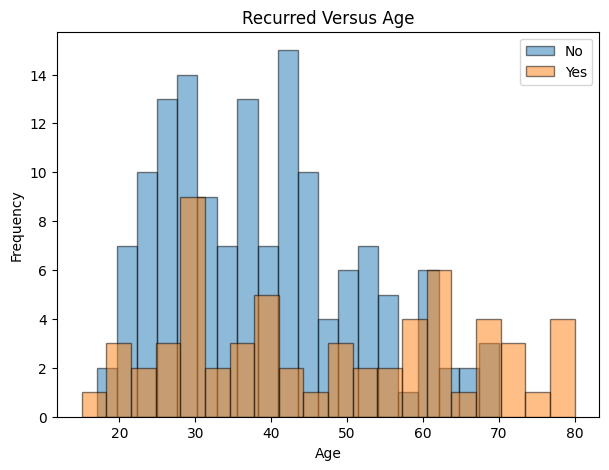

In [84]:
##################################
# Comparing the numeric predictors
# grouped by the target variable
##################################
colors = plt.get_cmap('tab10').colors
plt.figure(figsize=(7, 5))
group_no = thyroid_cancer_train[thyroid_cancer_train[histogram_grouping_variable] == 'No'][histogram_frequency_variable]
group_yes = thyroid_cancer_train[thyroid_cancer_train[histogram_grouping_variable] == 'Yes'][histogram_frequency_variable]
plt.hist(group_no, bins=20, alpha=0.5, color=colors[0], label='No', edgecolor='black')
plt.hist(group_yes, bins=20, alpha=0.5, color=colors[1], label='Yes', edgecolor='black')
plt.title(f'{histogram_grouping_variable} Versus {histogram_frequency_variable}')
plt.xlabel(histogram_frequency_variable)
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [85]:
##################################
# Performing a general exploration of the categorical variable levels
# based on the ordered categories
##################################
ordered_cat_cols = thyroid_cancer_train.select_dtypes(include=["category"]).columns
for col in ordered_cat_cols:
    print(f"Column: {col}")
    print("Absolute Frequencies:")
    print(thyroid_cancer_train[col].value_counts().reindex(thyroid_cancer_train[col].cat.categories))
    print("\nNormalized Frequencies:")
    print(thyroid_cancer_train[col].value_counts(normalize=True).reindex(thyroid_cancer_train[col].cat.categories))
    print("-" * 50)
    

Column: Gender
Absolute Frequencies:
M     46
F    158
Name: count, dtype: int64

Normalized Frequencies:
M    0.22549
F    0.77451
Name: proportion, dtype: float64
--------------------------------------------------
Column: Smoking
Absolute Frequencies:
No     172
Yes     32
Name: count, dtype: int64

Normalized Frequencies:
No     0.843137
Yes    0.156863
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Smoking
Absolute Frequencies:
No     189
Yes     15
Name: count, dtype: int64

Normalized Frequencies:
No     0.926471
Yes    0.073529
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Radiotherapy
Absolute Frequencies:
No     199
Yes      5
Name: count, dtype: int64

Normalized Frequencies:
No     0.97549
Yes    0.02451
Name: proportion, dtype: float64
--------------------------------------------------
Column: Thyroid_Function
Absolute Frequencies:
Euthyroid                      176
Subclinical 

In [86]:
##################################
# Segregating the target variable
# and categorical predictors
##################################
proportion_y_variables = thyroid_cancer_train_predictors_categorical
proportion_x_variable = 'Recurred'


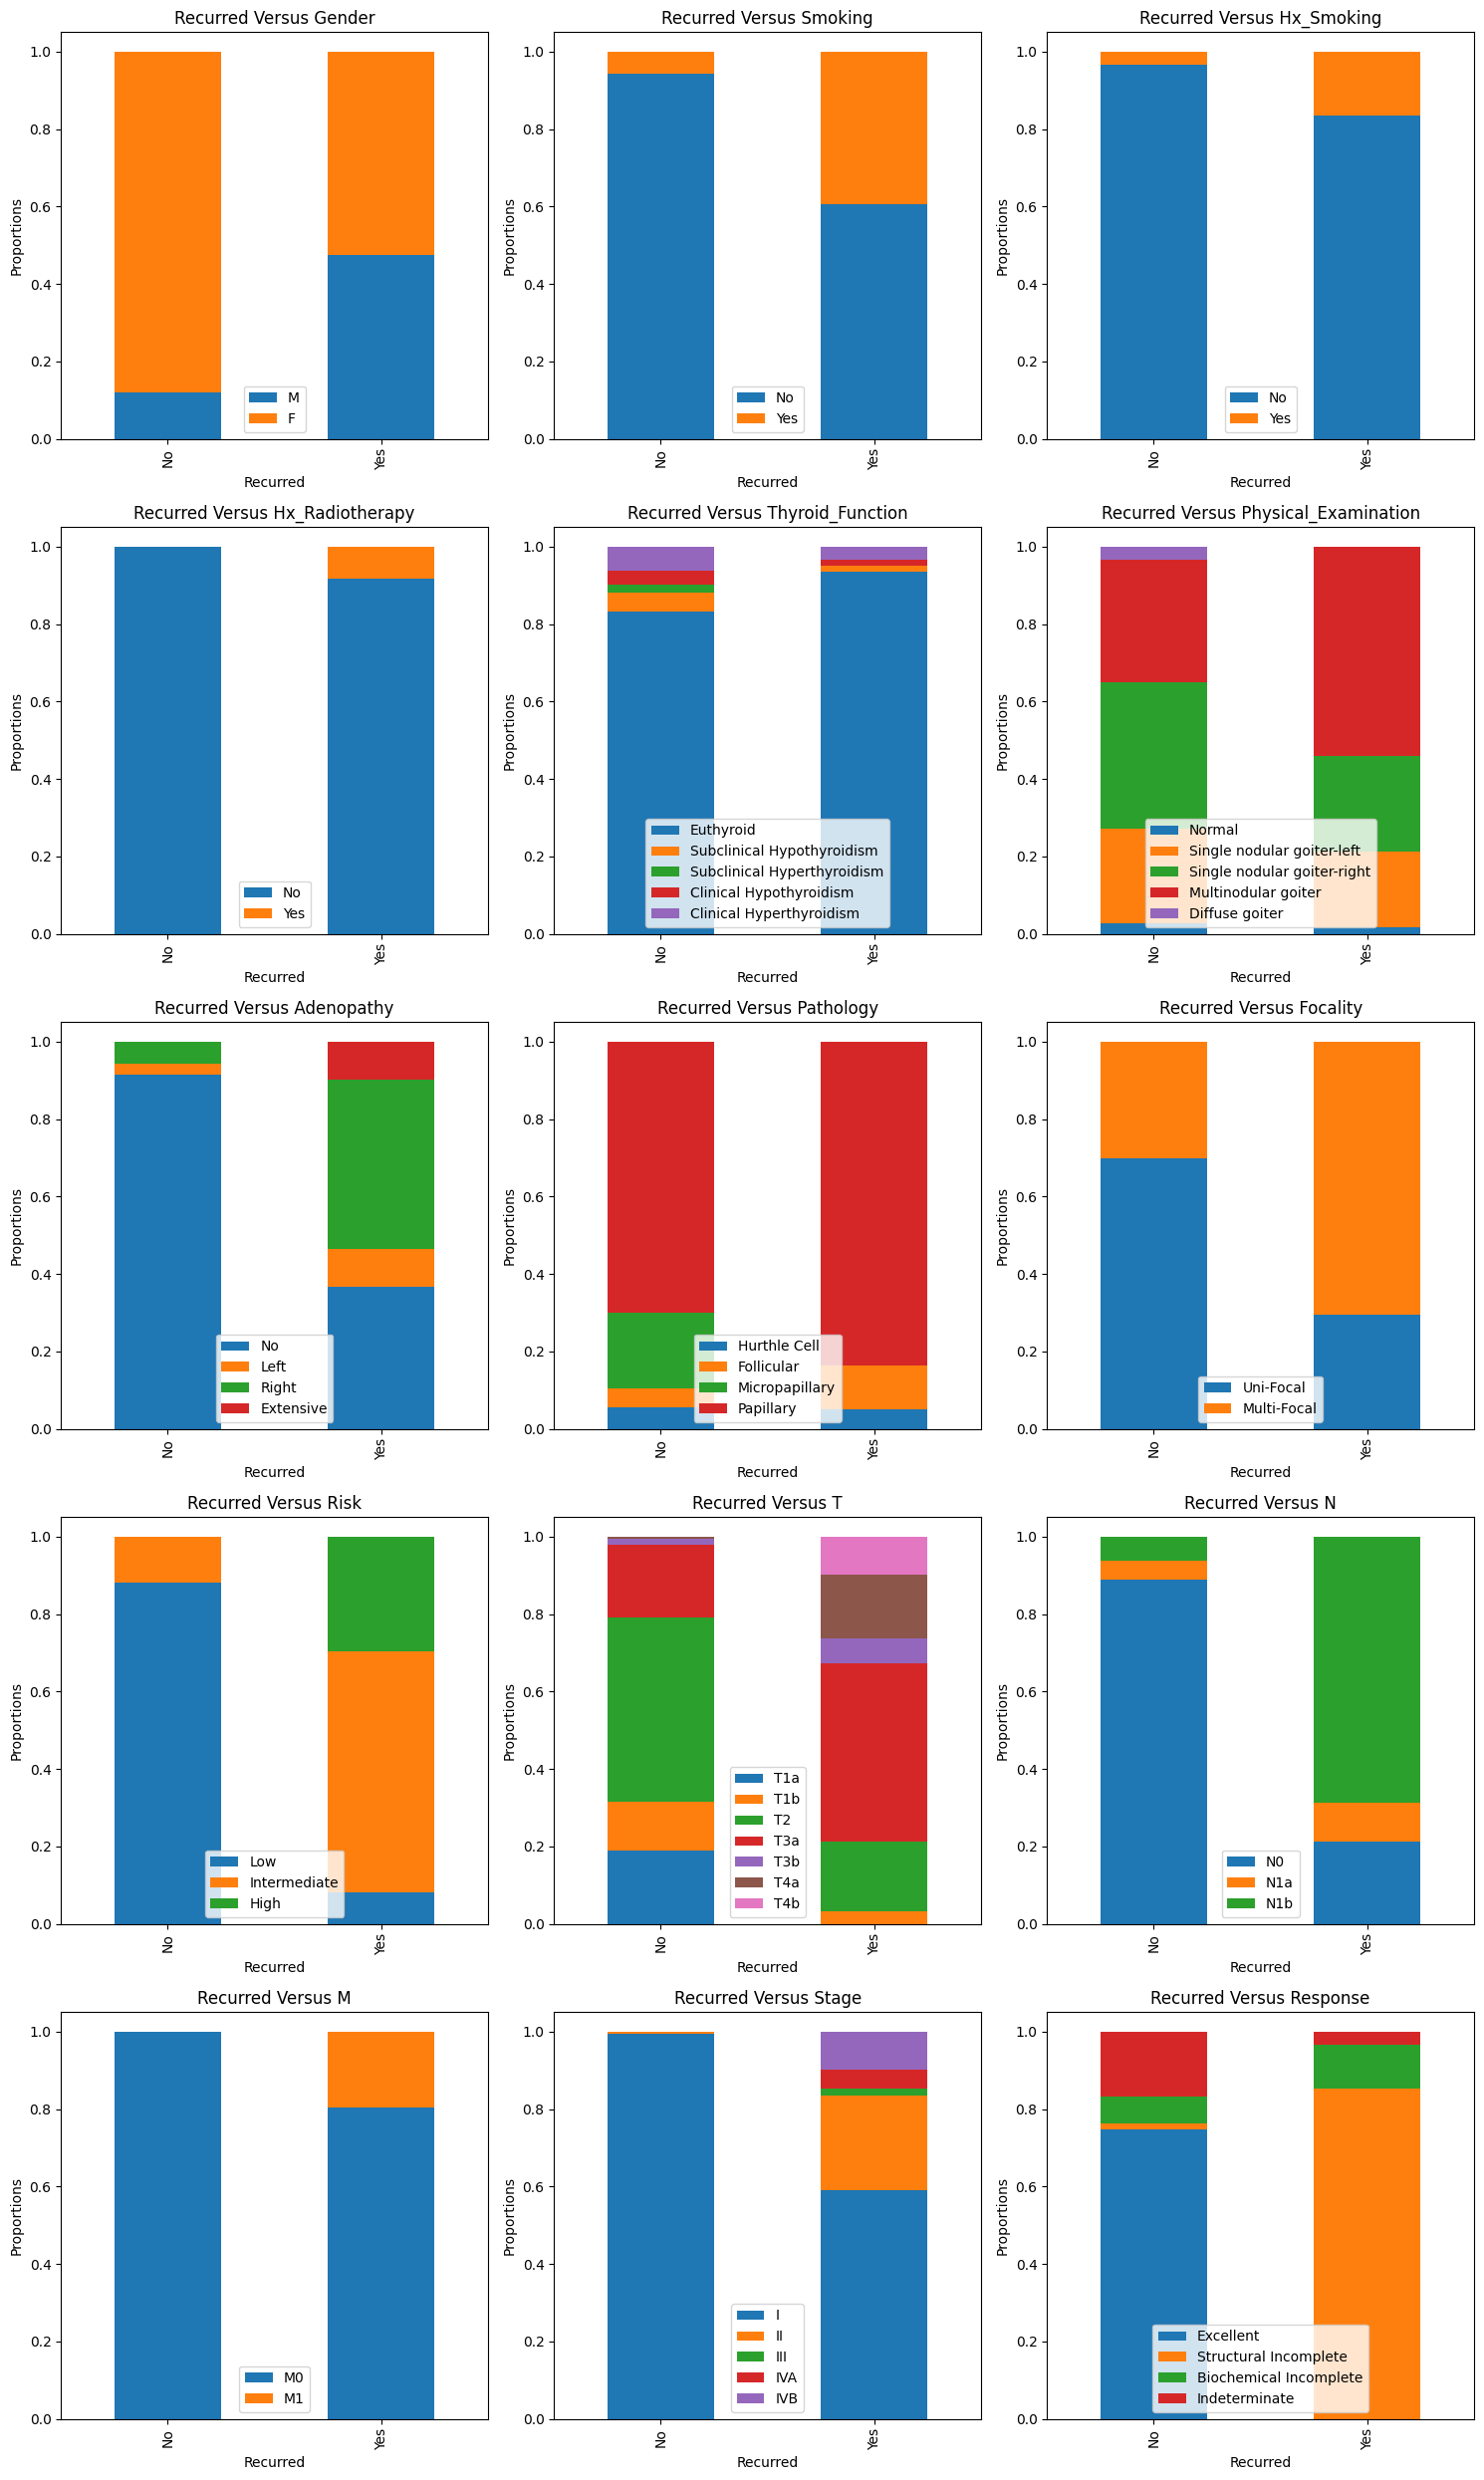

In [87]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 5
num_cols = 3

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(proportion_y_variables):
    ax = axes[i]
    category_counts = thyroid_cancer_train.groupby([proportion_x_variable, y_variable], observed=True).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{proportion_x_variable} Versus {y_variable}')
    ax.set_xlabel(proportion_x_variable)
    ax.set_ylabel('Proportions')
    ax.legend(loc="lower center")

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()


In [88]:
##################################
# Removing predictors observed with extreme
# near-zero variance and a limited number of levels
##################################
thyroid_cancer_train_column_filtered = thyroid_cancer_train.drop(columns=['Hx_Radiotherapy','M','Hx_Smoking'])
thyroid_cancer_train_column_filtered.head()


,Age,Gender,Smoking,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,Stage,Response,Recurred
335,29,M,No,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,Intermediate,T3a,N1b,I,Structural Incomplete,Yes
201,25,F,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Low,T2,N1b,I,Excellent,No
134,51,F,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,I,Excellent,No
35,37,F,No,Subclinical Hypothyroidism,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,I,Excellent,No
380,72,M,Yes,Euthyroid,Multinodular goiter,NaN,Papillary,Multi-Focal,High,T4b,N1b,IVB,Structural Incomplete,Yes


### 1.4.3 Category Aggregration and Encoding <a class="anchor" id="1.4.8"></a>

In [89]:
##################################
# Merging small categories into broader groups 
# for certain categorical predictors
# to ensure sufficient representation in statistical models 
# and prevent sparsity issues in cross-validation
##################################
thyroid_cancer_train_column_filtered['Thyroid_Function'] = thyroid_cancer_train_column_filtered['Thyroid_Function'].map(lambda x: 'Euthyroid' if (x in ['Euthyroid'])  else 'Hypothyroidism or Hyperthyroidism')
thyroid_cancer_train_column_filtered['Physical_Examination'] = thyroid_cancer_train_column_filtered['Physical_Examination'].map(lambda x: 'Normal or Single Nodular Goiter' if (x in ['Normal', 'Single nodular goiter-left', 'Single nodular goiter-right'])  else 'Multinodular or Diffuse Goiter')
thyroid_cancer_train_column_filtered['Adenopathy'] = thyroid_cancer_train_column_filtered['Adenopathy'].map(lambda x: 'No' if x == 'No' else ('Yes' if pd.notna(x) and x != '' else x))
thyroid_cancer_train_column_filtered['Pathology'] = thyroid_cancer_train_column_filtered['Pathology'].map(lambda x: 'Non-Papillary' if (x in ['Hurthle Cell', 'Follicular'])  else 'Papillary')
thyroid_cancer_train_column_filtered['Risk'] = thyroid_cancer_train_column_filtered['Risk'].map(lambda x: 'Low' if (x in ['Low'])  else 'Intermediate to High')
thyroid_cancer_train_column_filtered['T'] = thyroid_cancer_train_column_filtered['T'].map(lambda x: 'T1 to T2' if (x in ['T1a', 'T1b', 'T2'])  else 'T3 to T4b')
thyroid_cancer_train_column_filtered['N'] = thyroid_cancer_train_column_filtered['N'].map(lambda x: 'N0' if (x in ['N0'])  else 'N1')
thyroid_cancer_train_column_filtered['Stage'] = thyroid_cancer_train_column_filtered['Stage'].map(lambda x: 'I' if (x in ['I'])  else 'II to IVB')
thyroid_cancer_train_column_filtered['Response'] = thyroid_cancer_train_column_filtered['Response'].map(lambda x: 'Indeterminate or Incomplete' if (x in ['Indeterminate', 'Structural Incomplete', 'Biochemical Incomplete'])  else 'Excellent')
thyroid_cancer_train_column_filtered.head()


,Age,Gender,Smoking,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,Stage,Response,Recurred
335,29,M,No,Euthyroid,Multinodular or Diffuse Goiter,Yes,Papillary,Multi-Focal,Intermediate to High,T3 to T4b,N1,I,Indeterminate or Incomplete,Yes
201,25,F,No,Euthyroid,Normal or Single Nodular Goiter,Yes,Papillary,Multi-Focal,Low,T1 to T2,N1,I,Excellent,No
134,51,F,No,Euthyroid,Multinodular or Diffuse Goiter,No,Papillary,Uni-Focal,Low,T1 to T2,N0,I,Excellent,No
35,37,F,No,Hypothyroidism or Hyperthyroidism,Normal or Single Nodular Goiter,No,Papillary,Uni-Focal,Low,T1 to T2,N0,I,Excellent,No
380,72,M,Yes,Euthyroid,Multinodular or Diffuse Goiter,NaN,Papillary,Multi-Focal,Intermediate to High,T3 to T4b,N1,II to IVB,Indeterminate or Incomplete,Yes


In [90]:
##################################
# Performing a general exploration of the categorical variable levels
# based on the ordered categories
##################################
ordered_cat_cols = thyroid_cancer_train_column_filtered.select_dtypes(include=["category"]).columns
for col in ordered_cat_cols:
    print(f"Column: {col}")
    print("Absolute Frequencies:")
    print(thyroid_cancer_train_column_filtered[col].value_counts().reindex(thyroid_cancer_train_column_filtered[col].cat.categories))
    print("\nNormalized Frequencies:")
    print(thyroid_cancer_train_column_filtered[col].value_counts(normalize=True).reindex(thyroid_cancer_train_column_filtered[col].cat.categories))
    print("-" * 50)
    

Column: Gender
Absolute Frequencies:
M     46
F    158
Name: count, dtype: int64

Normalized Frequencies:
M    0.22549
F    0.77451
Name: proportion, dtype: float64
--------------------------------------------------
Column: Smoking
Absolute Frequencies:
No     172
Yes     32
Name: count, dtype: int64

Normalized Frequencies:
No     0.843137
Yes    0.156863
Name: proportion, dtype: float64
--------------------------------------------------
Column: Focality
Absolute Frequencies:
Uni-Focal      118
Multi-Focal     86
Name: count, dtype: int64

Normalized Frequencies:
Uni-Focal      0.578431
Multi-Focal    0.421569
Name: proportion, dtype: float64
--------------------------------------------------
Column: Recurred
Absolute Frequencies:
No     143
Yes     61
Name: count, dtype: int64

Normalized Frequencies:
No     0.70098
Yes    0.29902
Name: proportion, dtype: float64
--------------------------------------------------


In [91]:
##################################
# Segregating the target
# and predictor variables
##################################
thyroid_cancer_train_predictors = thyroid_cancer_train_column_filtered.iloc[:,:-1].columns
thyroid_cancer_train_predictors_numeric = thyroid_cancer_train_column_filtered.iloc[:,:-1].loc[:, thyroid_cancer_train_column_filtered.iloc[:,:-1].columns == 'Age'].columns
thyroid_cancer_train_predictors_categorical = thyroid_cancer_train_column_filtered.iloc[:,:-1].loc[:,thyroid_cancer_train_column_filtered.iloc[:,:-1].columns != 'Age'].columns


In [92]:
##################################
# Segregating the target variable
# and categorical predictors
##################################
proportion_y_variables = thyroid_cancer_train_predictors_categorical
proportion_x_variable = 'Recurred'


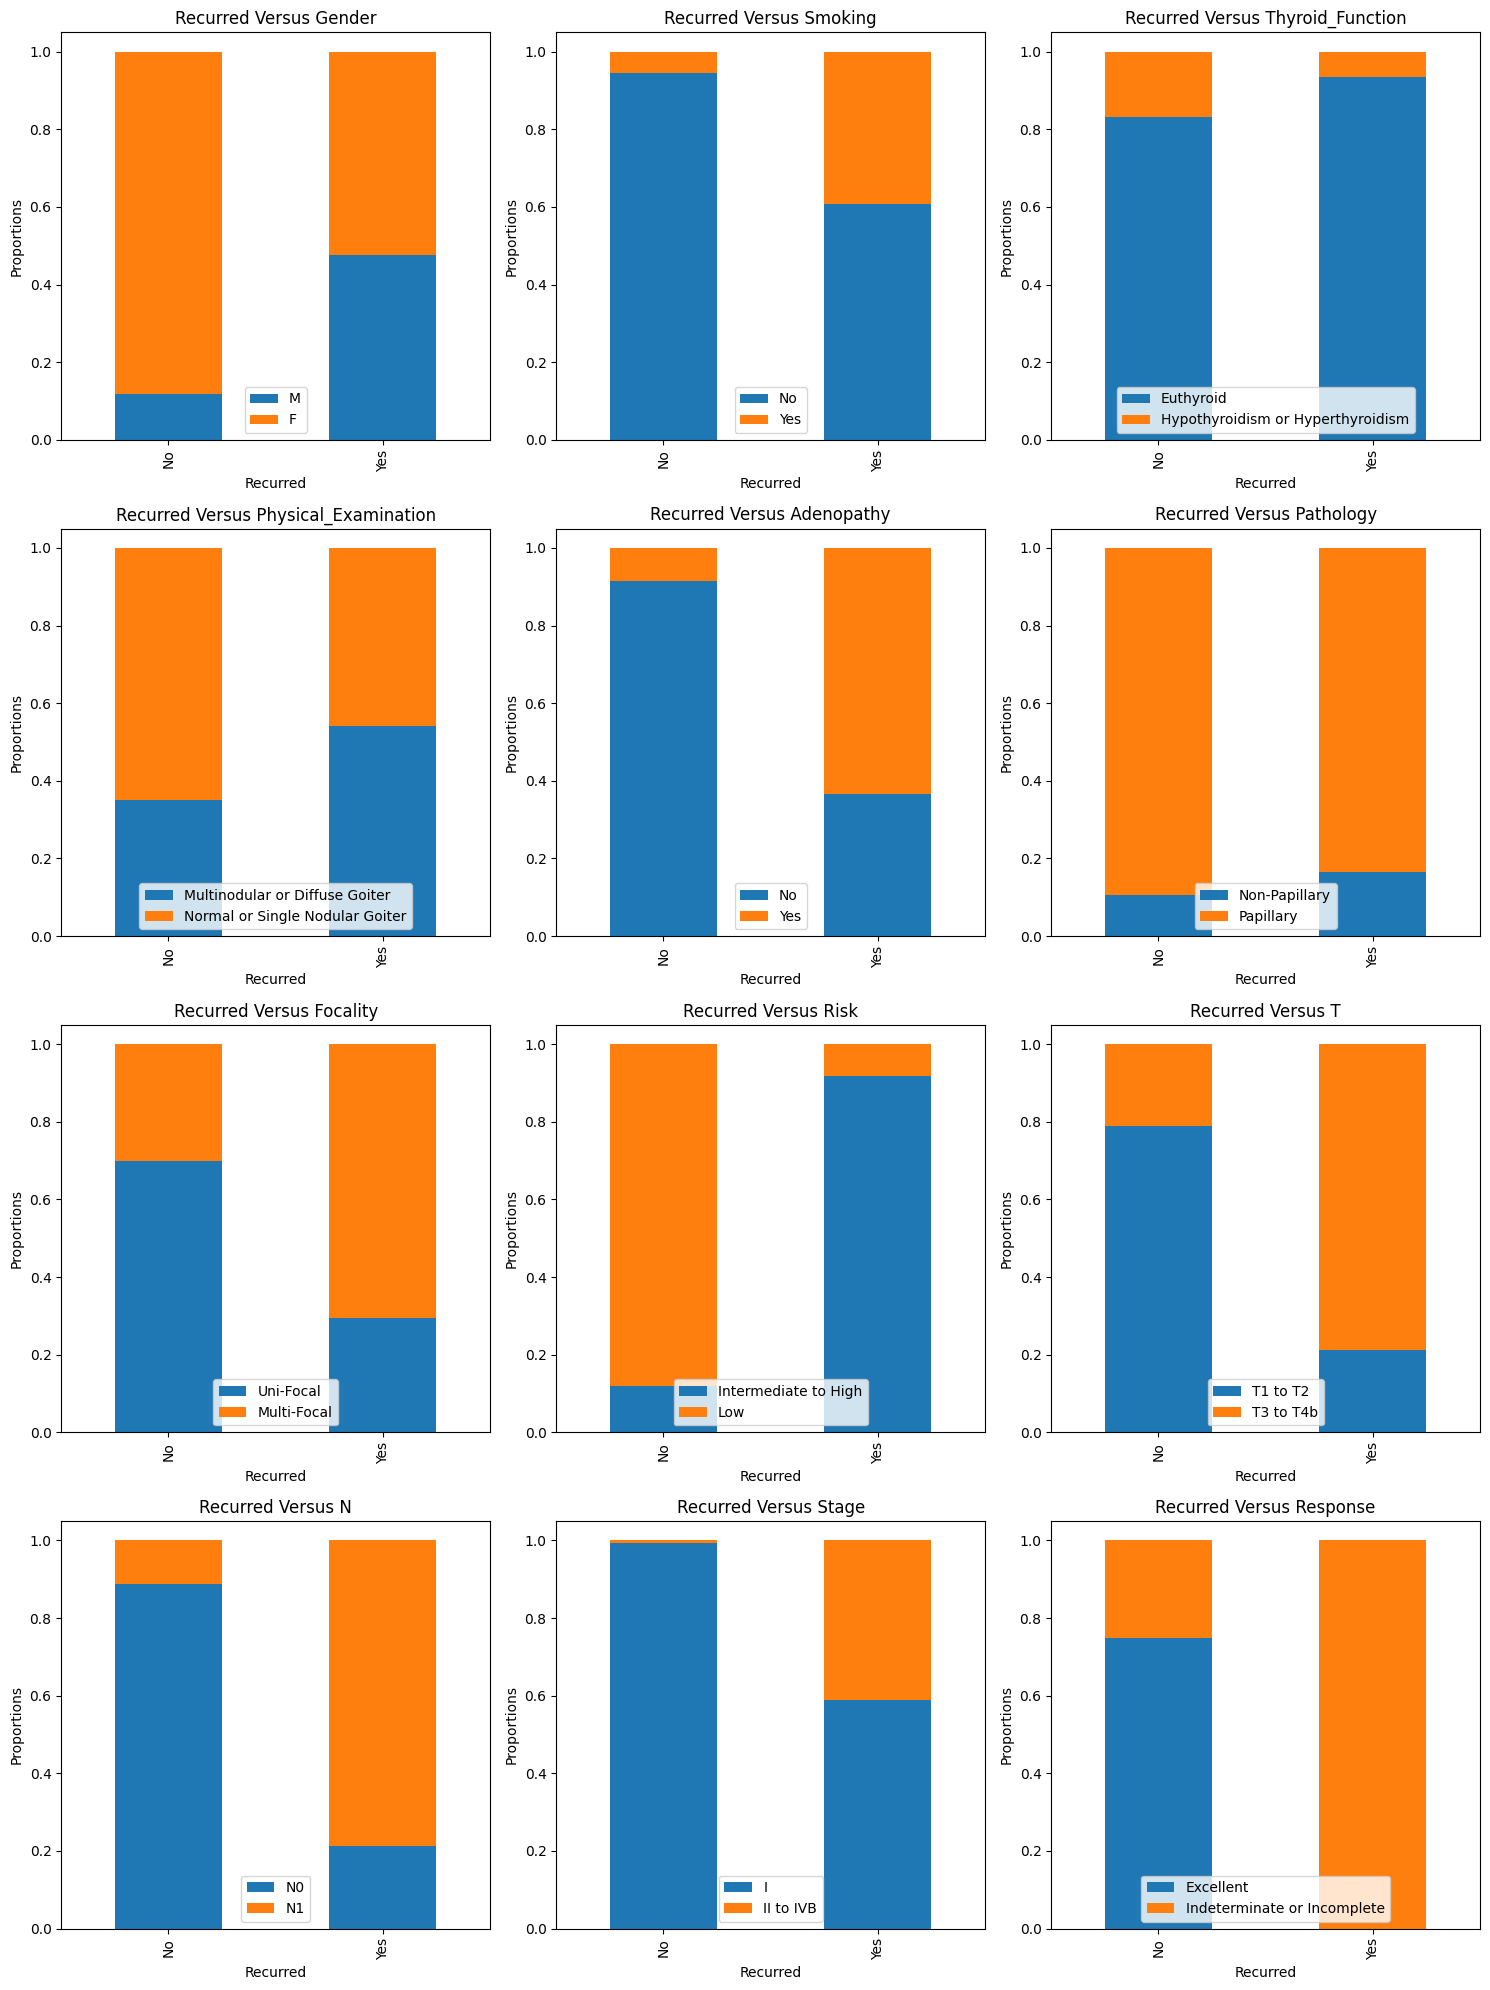

In [93]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 4
num_cols = 3

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(proportion_y_variables):
    ax = axes[i]
    category_counts = thyroid_cancer_train_column_filtered.groupby([proportion_x_variable, y_variable], observed=True).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{proportion_x_variable} Versus {y_variable}')
    ax.set_xlabel(proportion_x_variable)
    ax.set_ylabel('Proportions')
    ax.legend(loc="lower center")

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()


### 1.4.4 Missing Data Imputation <a class="anchor" id="1.4.4"></a>

1. Missing data for a categorical predictor in the training data noted with Null.Count>0 and Fill.Rate<1.0 were imputed using the iterative imputer algorithm with a random forest estimator.
    * <span style="color: #FF0000">Adenopathy</span>: Null.Count = 23, Fill.Rate = 0.887


In [94]:
##################################
# Formulating the summary
# for all columns
##################################
data_type_list = list(thyroid_cancer_train_column_filtered.dtypes)
variable_name_list = list(thyroid_cancer_train_column_filtered.columns)
row_count_list = list([len(thyroid_cancer_train_column_filtered)] * len(thyroid_cancer_train_column_filtered.columns))
non_null_count_list = list(thyroid_cancer_train_column_filtered.count())
null_count_list = list(thyroid_cancer_train_column_filtered.isna().sum(axis=0))
fill_rate_list = map(truediv, non_null_count_list, row_count_list)
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)


,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,Age,int64,204,204,0,1.000000
1,Gender,category,204,204,0,1.000000
2,Smoking,category,204,204,0,1.000000
3,Thyroid_Function,object,204,204,0,1.000000
4,Physical_Examination,object,204,204,0,1.000000
5,Adenopathy,object,204,181,23,0.887255
6,Pathology,object,204,204,0,1.000000
7,Focality,category,204,204,0,1.000000
8,Risk,object,204,204,0,1.000000
9,T,object,204,204,0,1.000000


In [95]:
##################################
# Encoding categorical features
##################################
encoder = OrdinalEncoder()
thyroid_cancer_train_column_filtered_encoded = encoder.fit_transform(thyroid_cancer_train_column_filtered)


In [96]:
##################################
# Defining the estimator to be used
# at each step of the round-robin imputation
##################################
rf_classifier_imputer = RandomForestClassifier(n_estimators=100, random_state=88888888)


In [97]:
##################################
# Defining the parameter of the
# iterative imputer which will estimate 
# the columns with missing values
# as a function of the other columns
# in a round-robin fashion
##################################
rf_iterative_imputer = IterativeImputer(
    estimator=rf_classifier_imputer, 
    max_iter=10,
    tol=1e-10,
    imputation_order='ascending',
    random_state=88888888
)


In [98]:
##################################
# Implementing the iterative imputer 
##################################
thyroid_cancer_train_column_filtered_imputed_array = rf_iterative_imputer.fit_transform(thyroid_cancer_train_column_filtered_encoded)


In [99]:
##################################
# Convert back to original categories
##################################
thyroid_cancer_train_column_filtered_imputed = encoder.inverse_transform(thyroid_cancer_train_column_filtered_imputed_array)


In [100]:
##################################
# Transforming the imputed data
# from an array to a dataframe
##################################
thyroid_cancer_train_column_filtered_imputed = pd.DataFrame(thyroid_cancer_train_column_filtered_imputed, columns=thyroid_cancer_train_column_filtered.columns)
display(thyroid_cancer_train_column_filtered_imputed.head())


,Age,Gender,Smoking,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,Stage,Response,Recurred
0,29,M,No,Euthyroid,Multinodular or Diffuse Goiter,Yes,Papillary,Multi-Focal,Intermediate to High,T3 to T4b,N1,I,Indeterminate or Incomplete,Yes
1,25,F,No,Euthyroid,Normal or Single Nodular Goiter,Yes,Papillary,Multi-Focal,Low,T1 to T2,N1,I,Excellent,No
2,51,F,No,Euthyroid,Multinodular or Diffuse Goiter,No,Papillary,Uni-Focal,Low,T1 to T2,N0,I,Excellent,No
3,37,F,No,Hypothyroidism or Hyperthyroidism,Normal or Single Nodular Goiter,No,Papillary,Uni-Focal,Low,T1 to T2,N0,I,Excellent,No
4,72,M,Yes,Euthyroid,Multinodular or Diffuse Goiter,Yes,Papillary,Multi-Focal,Intermediate to High,T3 to T4b,N1,II to IVB,Indeterminate or Incomplete,Yes


In [101]:
##################################
# Formulating the summary
# for all columns
##################################
data_type_list = list(thyroid_cancer_train_column_filtered_imputed.dtypes)
variable_name_list = list(thyroid_cancer_train_column_filtered_imputed.columns)
row_count_list = list([len(thyroid_cancer_train_column_filtered_imputed)] * len(thyroid_cancer_train_column_filtered_imputed.columns))
non_null_count_list = list(thyroid_cancer_train_column_filtered_imputed.count())
null_count_list = list(thyroid_cancer_train_column_filtered_imputed.isna().sum(axis=0))
fill_rate_list = map(truediv, non_null_count_list, row_count_list)
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)


,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,Age,object,204,204,0,1.0
1,Gender,object,204,204,0,1.0
2,Smoking,object,204,204,0,1.0
3,Thyroid_Function,object,204,204,0,1.0
4,Physical_Examination,object,204,204,0,1.0
5,Adenopathy,object,204,204,0,1.0
6,Pathology,object,204,204,0,1.0
7,Focality,object,204,204,0,1.0
8,Risk,object,204,204,0,1.0
9,T,object,204,204,0,1.0


### 1.4.5 Outlier and Distributional Shape Analysis <a class="anchor" id="1.4.5"></a>

1. No outliers (Outlier.Count>0, Outlier.Ratio>0.000), high skewness (Skewness>3 or Skewness<(-3)) or abnormal kurtosis (Skewness>2 or Skewness<(-2)) observed for the numeric predictor.
    * <span style="color: #FF0000">Age</span>: Outlier.Count = 0, Outlier.Ratio = 0.000, Skewness = 0.592, Kurtosis = -0.461


In [102]:
##################################
# Formulating the imputed dataset
# with numeric columns only
##################################
thyroid_cancer_train_column_filtered_imputed['Age'] = pd.to_numeric(thyroid_cancer_train_column_filtered_imputed['Age'])
thyroid_cancer_train_column_filtered_imputed_numeric = thyroid_cancer_train_column_filtered_imputed.select_dtypes(include='number')
thyroid_cancer_train_column_filtered_imputed_numeric = thyroid_cancer_train_column_filtered_imputed_numeric.to_frame() if isinstance(thyroid_cancer_train_column_filtered_imputed_numeric, pd.Series) else thyroid_cancer_train_column_filtered_imputed_numeric


In [103]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = list(thyroid_cancer_train_column_filtered_imputed_numeric.columns)


In [104]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = thyroid_cancer_train_column_filtered_imputed_numeric.skew()


In [105]:
##################################
# Computing the interquartile range
# for all columns
##################################
thyroid_cancer_train_column_filtered_imputed_numeric_q1 = thyroid_cancer_train_column_filtered_imputed_numeric.quantile(0.25)
thyroid_cancer_train_column_filtered_imputed_numeric_q3 = thyroid_cancer_train_column_filtered_imputed_numeric.quantile(0.75)
thyroid_cancer_train_column_filtered_imputed_numeric_iqr = thyroid_cancer_train_column_filtered_imputed_numeric_q3 - thyroid_cancer_train_column_filtered_imputed_numeric_q1


In [106]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((thyroid_cancer_train_column_filtered_imputed_numeric < (thyroid_cancer_train_column_filtered_imputed_numeric_q1 - 1.5 * thyroid_cancer_train_column_filtered_imputed_numeric_iqr)) | (thyroid_cancer_train_column_filtered_imputed_numeric > (thyroid_cancer_train_column_filtered_imputed_numeric_q3 + 1.5 * thyroid_cancer_train_column_filtered_imputed_numeric_iqr))).sum() 


In [107]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(thyroid_cancer_train_column_filtered_imputed_numeric)] * len(thyroid_cancer_train_column_filtered_imputed_numeric.columns))


In [108]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)


In [109]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = thyroid_cancer_train_column_filtered_imputed_numeric.skew()


In [110]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = thyroid_cancer_train_column_filtered_imputed_numeric.kurtosis()


In [111]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list,
                                                  numeric_skewness_list,
                                                  numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_outlier_summary)


,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio,Skewness,Kurtosis
0,Age,0.592572,0,204,0.0,0.592572,-0.461287


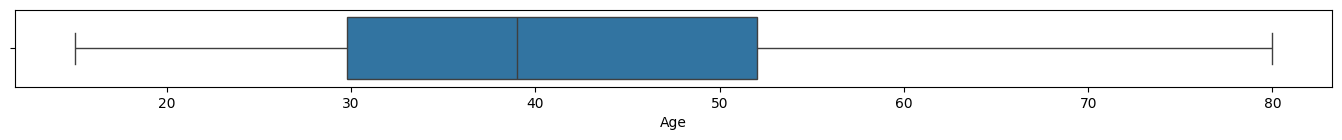

In [112]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in thyroid_cancer_train_column_filtered_imputed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=thyroid_cancer_train_column_filtered_imputed_numeric, x=column)
    

### 1.4.6 Collinearity <a class="anchor" id="1.4.6"></a>

In [113]:
##################################
# Creating a dataset copy and
# converting all values to numeric
# for correlation analysis
##################################
pd.set_option('future.no_silent_downcasting', True)
thyroid_cancer_train_correlation = thyroid_cancer_train_column_filtered_imputed.copy()
thyroid_cancer_train_correlation_object = thyroid_cancer_train_correlation.iloc[:,1:13].columns
custom_category_orders = {
    'Gender': ['M', 'F'],  
    'Smoking': ['No', 'Yes'],  
    'Thyroid_Function': ['Euthyroid', 'Hypothyroidism or Hyperthyroidism'],  
    'Physical_Examination': ['Normal or Single Nodular Goiter', 'Multinodular or Diffuse Goiter'],  
    'Adenopathy': ['No', 'Yes'],  
    'Pathology': ['Non-Papillary', 'Papillary'],  
    'Focality': ['Uni-Focal', 'Multi-Focal'],  
    'Risk': ['Low', 'Intermediate to High'],  
    'T': ['T1 to T2', 'T3 to T4b'],  
    'N': ['N0', 'N1'],  
    'Stage': ['I', 'II to IVB'],  
    'Response': ['Excellent', 'Indeterminate or Incomplete'] 
}
encoder = OrdinalEncoder(categories=[custom_category_orders[col] for col in thyroid_cancer_train_correlation_object])
thyroid_cancer_train_correlation[thyroid_cancer_train_correlation_object] = encoder.fit_transform(
    thyroid_cancer_train_correlation[thyroid_cancer_train_correlation_object]
)
thyroid_cancer_train_correlation = thyroid_cancer_train_correlation.drop(['Recurred'], axis=1)
display(thyroid_cancer_train_correlation)


,Age,Gender,Smoking,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,Stage,Response
0,29,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,25,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,51,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
200,21,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
201,61,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
202,39,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [114]:
##################################
# Initializing the correlation matrix
##################################
thyroid_cancer_train_correlation_matrix = pd.DataFrame(np.zeros((len(thyroid_cancer_train_correlation.columns), len(thyroid_cancer_train_correlation.columns))),
                                                       columns=thyroid_cancer_train_correlation.columns,
                                                       index=thyroid_cancer_train_correlation.columns)


In [115]:
##################################
# Creating an empty correlation matrix
##################################
thyroid_cancer_train_correlation_matrix = pd.DataFrame(
    np.zeros((len(thyroid_cancer_train_correlation.columns), len(thyroid_cancer_train_correlation.columns))),
    index=thyroid_cancer_train_correlation.columns,
    columns=thyroid_cancer_train_correlation.columns
)


##################################
# Calculating different types
# of correlation coefficients
# per variable type
##################################
for i in range(len(thyroid_cancer_train_correlation.columns)):
    for j in range(i, len(thyroid_cancer_train_correlation.columns)):
        if i == j:
            thyroid_cancer_train_correlation_matrix.iloc[i, j] = 1.0  
        else:
            col_i = thyroid_cancer_train_correlation.iloc[:, i]
            col_j = thyroid_cancer_train_correlation.iloc[:, j]

            # Detecting binary variables (assumes binary variables are coded as 0/1)
            is_binary_i = col_i.nunique() == 2
            is_binary_j = col_j.nunique() == 2

            # Computing the Pearson correlation for two continuous variables
            if col_i.dtype in ['int64', 'float64'] and col_j.dtype in ['int64', 'float64']:
                corr = col_i.corr(col_j)

            # Computing the Point-Biserial correlation for continuous and binary variables
            elif (col_i.dtype in ['int64', 'float64'] and is_binary_j) or (col_j.dtype in ['int64', 'float64'] and is_binary_i):
                continuous_var = col_i if col_i.dtype in ['int64', 'float64'] else col_j
                binary_var = col_j if is_binary_j else col_i

                # Convert binary variable to 0/1 (if not already)
                binary_var = binary_var.astype('category').cat.codes
                corr, _ = pointbiserialr(continuous_var, binary_var)

            # Computing the Phi coefficient for two binary variables
            elif is_binary_i and is_binary_j:
                corr = col_i.corr(col_j) 

            # Computing the Cramér's V for two categorical variables (if more than 2 categories)
            else:
                contingency_table = pd.crosstab(col_i, col_j)
                chi2, _, _, _ = chi2_contingency(contingency_table)
                n = contingency_table.sum().sum()
                phi2 = chi2 / n
                r, k = contingency_table.shape
                corr = np.sqrt(phi2 / min(k - 1, r - 1))  # Cramér's V formula

            # Assigning correlation values to the matrix
            thyroid_cancer_train_correlation_matrix.iloc[i, j] = corr
            thyroid_cancer_train_correlation_matrix.iloc[j, i] = corr

# Displaying the correlation matrix
display(thyroid_cancer_train_correlation_matrix)
            

,Age,Gender,Smoking,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,Stage,Response
Age,1.000000,-0.194235,0.384793,-0.064362,0.166593,0.062571,-0.103521,0.193520,0.218433,0.230384,0.032385,0.548657,0.277894
Gender,-0.194235,1.000000,-0.605869,-0.023393,-0.126177,-0.257996,0.048746,-0.204469,-0.331298,-0.178901,-0.292449,-0.286223,-0.261361
Smoking,0.384793,-0.605869,1.000000,0.023809,0.136654,0.266003,-0.208749,0.232285,0.352861,0.243106,0.260305,0.522287,0.345057
Thyroid_Function,-0.064362,-0.023393,0.023809,1.000000,0.075621,-0.093500,-0.068143,-0.052038,-0.030299,-0.079318,-0.054779,-0.024290,-0.151571
Physical_Examination,0.166593,-0.126177,0.136654,0.075621,1.000000,0.141619,0.035651,0.464966,0.276835,0.190238,0.192704,0.102383,0.170525
Adenopathy,0.062571,-0.257996,0.266003,-0.093500,0.141619,1.000000,0.036713,0.298165,0.685642,0.510376,0.838526,0.345677,0.509657
Pathology,-0.103521,0.048746,-0.208749,-0.068143,0.035651,0.036713,1.000000,-0.104765,-0.064050,-0.228898,0.091596,-0.081303,-0.212909
Focality,0.193520,-0.204469,0.232285,-0.052038,0.464966,0.298165,-0.104765,1.000000,0.439542,0.451800,0.364112,0.269075,0.379817
Risk,0.218433,-0.331298,0.352861,-0.030299,0.276835,0.685642,-0.064050,0.439542,1.000000,0.654179,0.751465,0.511978,0.620217
T,0.230384,-0.178901,0.243106,-0.079318,0.190238,0.510376,-0.228898,0.451800,0.654179,1.000000,0.489771,0.425255,0.583975


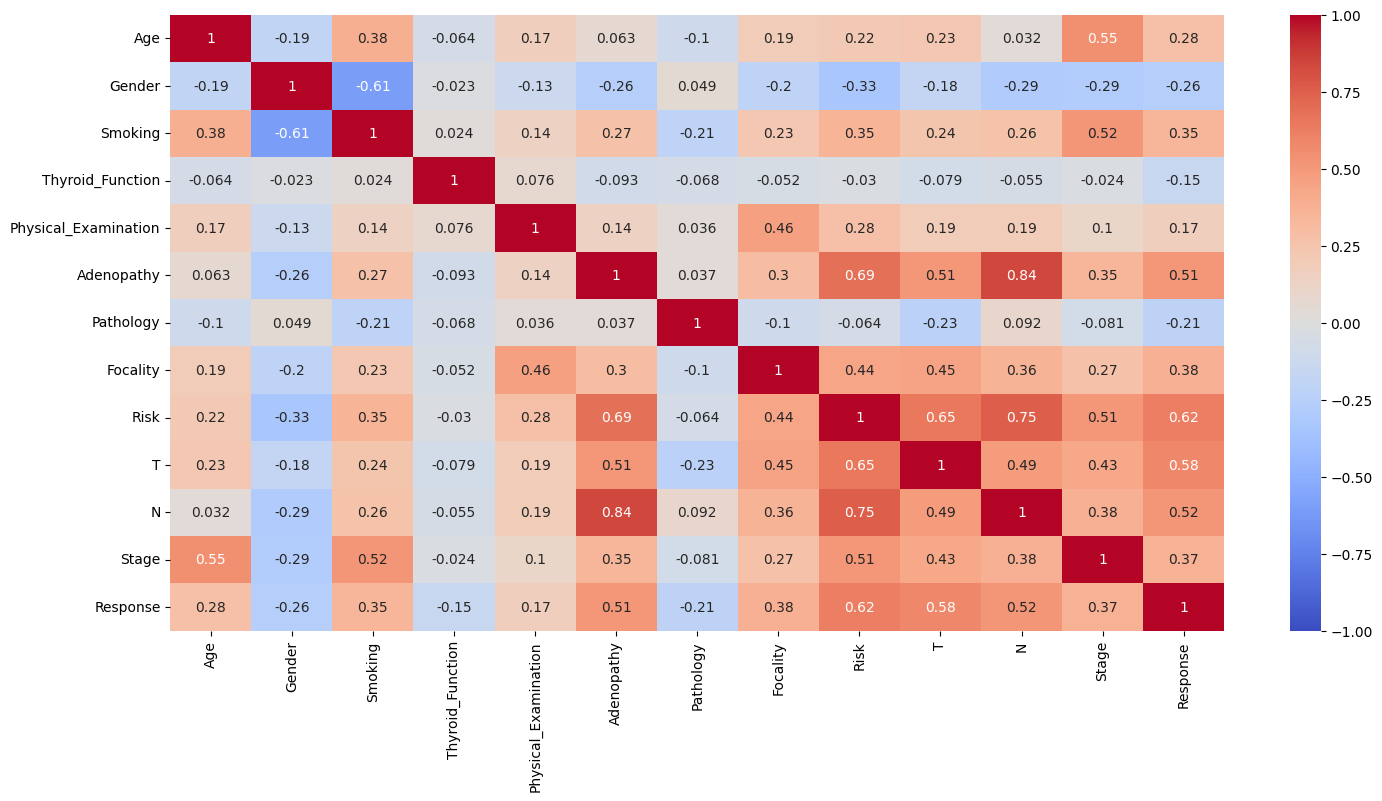

In [116]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric and categorical columns
##################################
plt.figure(figsize=(17, 8))
sns.heatmap(thyroid_cancer_train_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


### 1.4.6 Preprocessed Data Description <a class="anchor" id="1.4.6"></a>

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

In [117]:
##################################
# Segregating the target
# and predictor variables
##################################
thyroid_cancer_train_column_filtered_imputed_predictors = thyroid_cancer_train_column_filtered_imputed.iloc[:,:-1].columns
thyroid_cancer_train_column_filtered_imputed_predictors_numeric = thyroid_cancer_train_column_filtered_imputed.iloc[:,:-1].loc[:, thyroid_cancer_train_column_filtered_imputed.iloc[:,:-1].columns == 'Age'].columns
thyroid_cancer_train_column_filtered_imputed_predictors_categorical = thyroid_cancer_train_column_filtered_imputed.iloc[:,:-1].loc[:,thyroid_cancer_train_column_filtered_imputed.iloc[:,:-1].columns != 'Age'].columns


In [118]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = thyroid_cancer_train_column_filtered_imputed_predictors_numeric


In [119]:
##################################
# Segregating the target variable
# and numeric predictors
##################################
boxplot_y_variable = 'Recurred'
boxplot_x_variable = numeric_variable_name_list.values[0]


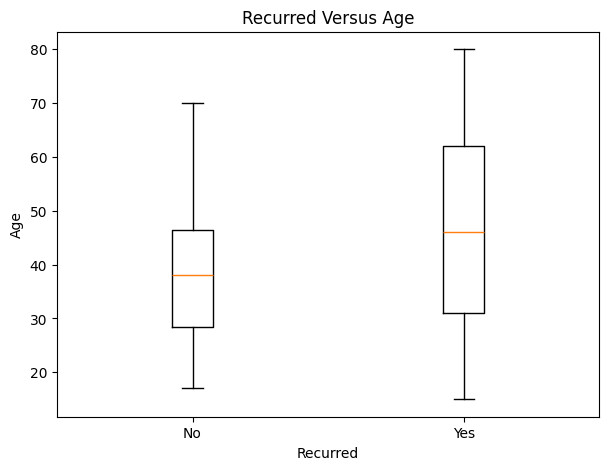

In [120]:
##################################
# Evaluating the numeric predictors
# against the target variable
##################################
plt.figure(figsize=(7, 5))
plt.boxplot([group[boxplot_x_variable] for name, group in thyroid_cancer_train_column_filtered_imputed.groupby(boxplot_y_variable, observed=True)])
plt.title(f'{boxplot_y_variable} Versus {boxplot_x_variable}')
plt.xlabel(boxplot_y_variable)
plt.ylabel(boxplot_x_variable)
plt.xticks(range(1, len(thyroid_cancer_train_column_filtered_imputed[boxplot_y_variable].unique()) + 1), ['No', 'Yes'])
plt.show()


In [121]:
##################################
# Segregating the target variable
# and categorical predictors
##################################
proportion_y_variables = thyroid_cancer_train_column_filtered_imputed_predictors_categorical
proportion_x_variable = 'Recurred'


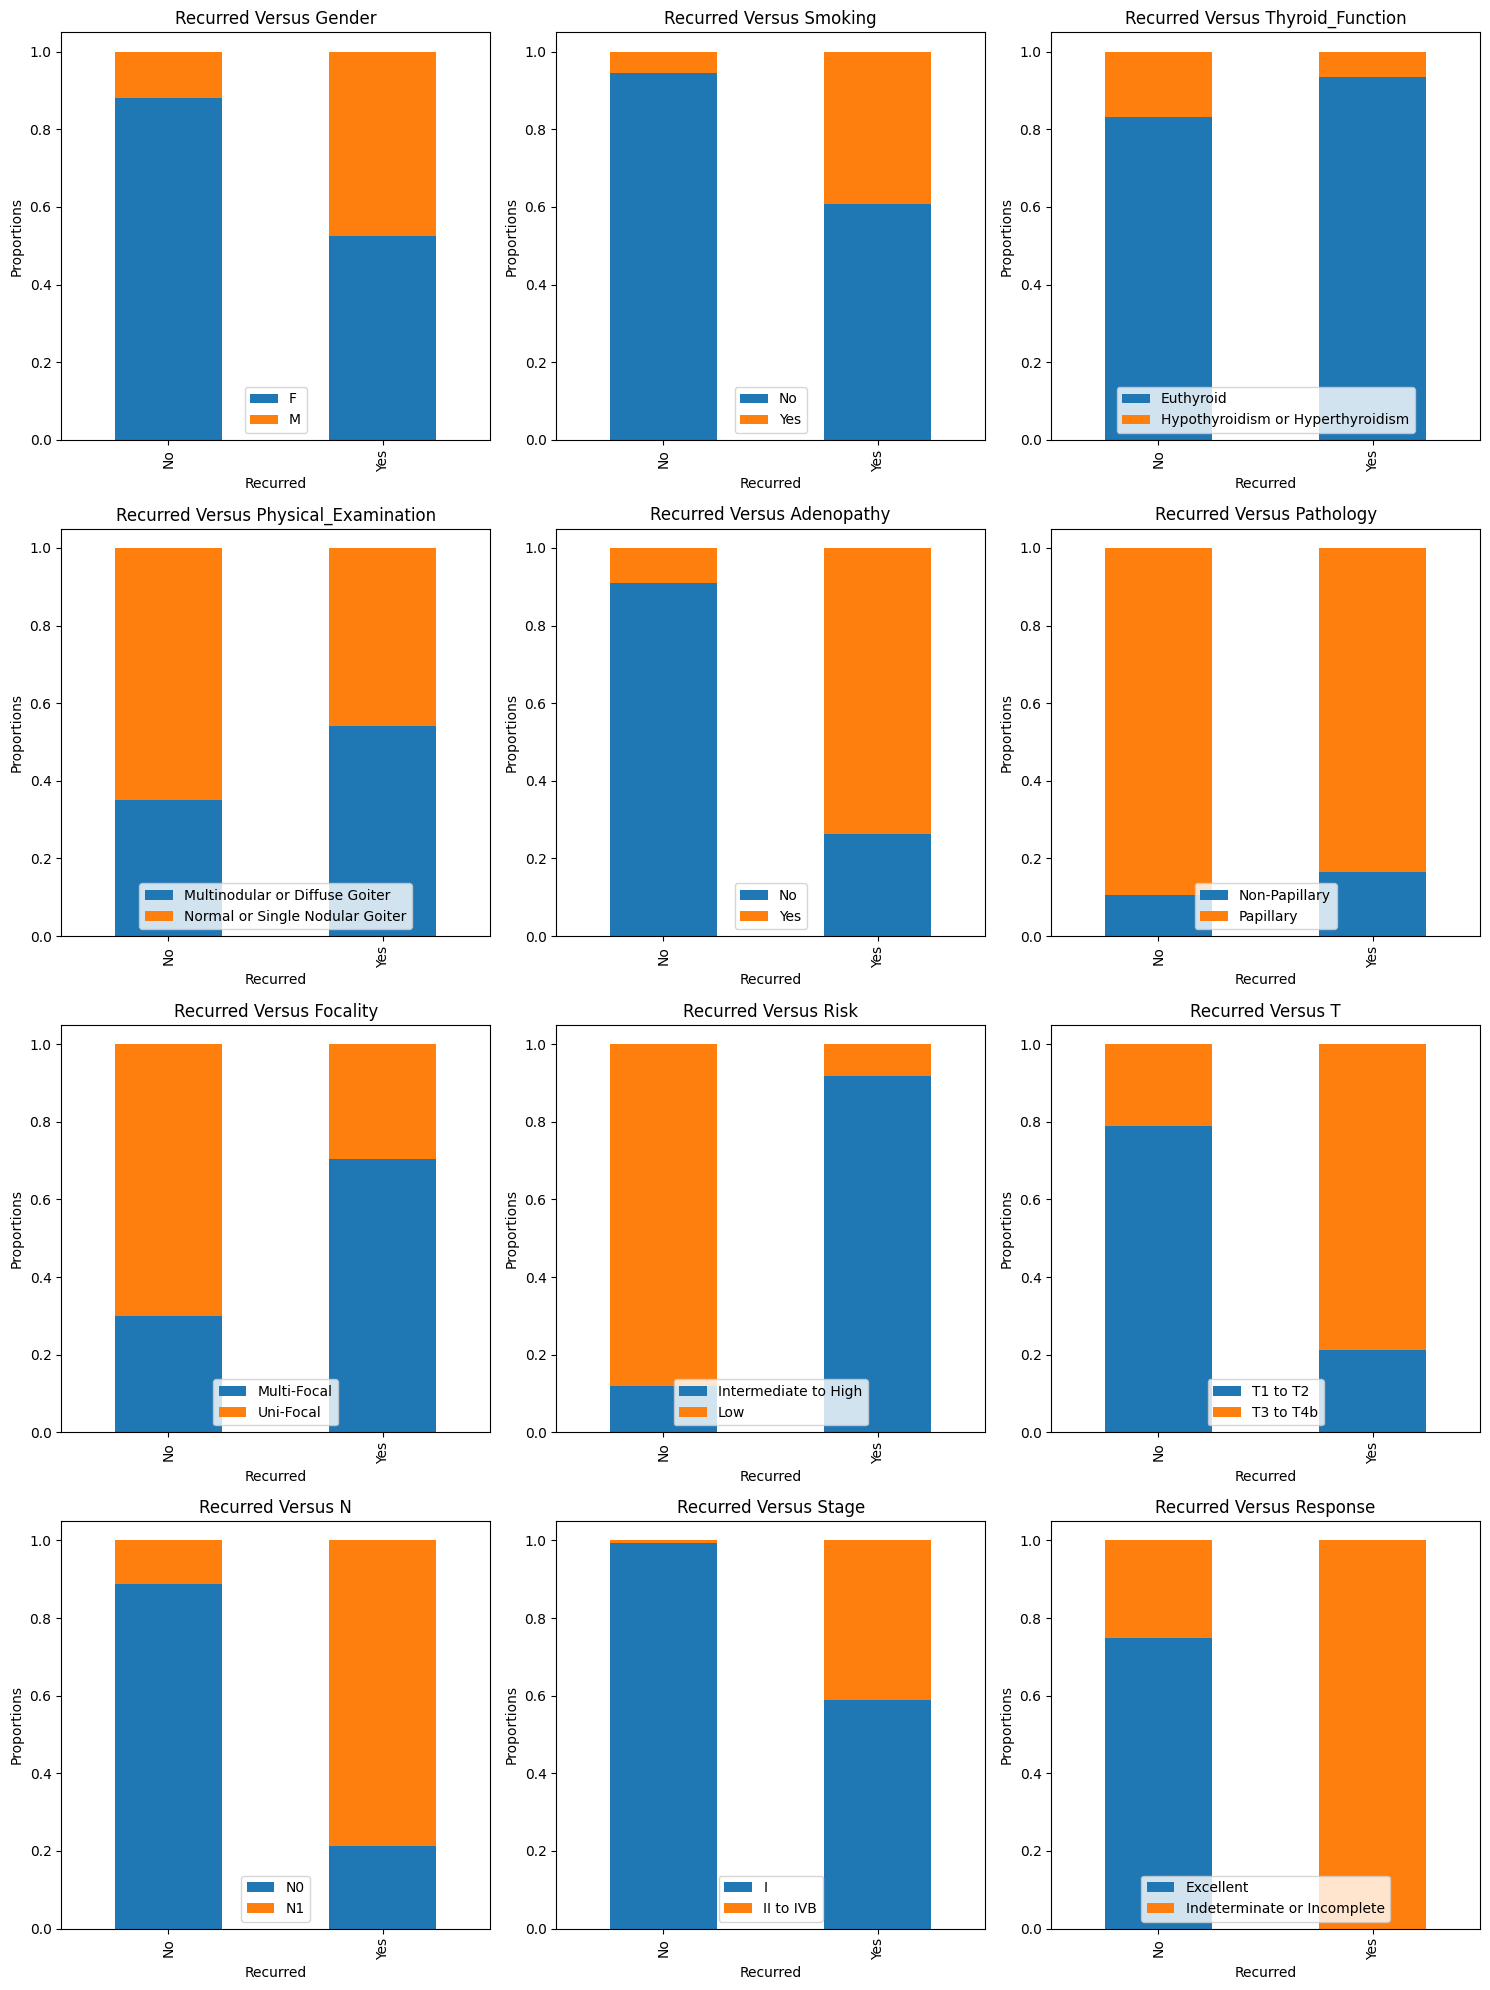

In [122]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 4
num_cols = 3

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(proportion_y_variables):
    ax = axes[i]
    category_counts = thyroid_cancer_train_column_filtered_imputed.groupby([proportion_x_variable, y_variable], observed=True).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{proportion_x_variable} Versus {y_variable}')
    ax.set_xlabel(proportion_x_variable)
    ax.set_ylabel('Proportions')
    ax.legend(loc="lower center")

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()


### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

In [123]:
##################################
# Computing the t-test 
# statistic and p-values
# between the target variable
# and numeric predictor columns
##################################
thyroid_cancer_numeric_ttest_target = {}
thyroid_cancer_numeric = thyroid_cancer_train_column_filtered_imputed.loc[:,(thyroid_cancer_train_column_filtered_imputed.columns == 'Age') | (thyroid_cancer_train_column_filtered_imputed.columns == 'Recurred')]
thyroid_cancer_numeric_columns = thyroid_cancer_train_column_filtered_imputed_predictors_numeric
for numeric_column in thyroid_cancer_numeric_columns:
    group_0 = thyroid_cancer_numeric[thyroid_cancer_numeric.loc[:,'Recurred']=='No']
    group_1 = thyroid_cancer_numeric[thyroid_cancer_numeric.loc[:,'Recurred']=='Yes']
    thyroid_cancer_numeric_ttest_target['Recurred_' + numeric_column] = stats.ttest_ind(
        group_0[numeric_column], 
        group_1[numeric_column], 
        equal_var=True)


In [124]:
##################################
# Formulating the pairwise ttest summary
# between the target variable
# and numeric predictor columns
##################################
thyroid_cancer_numeric_summary = thyroid_cancer_numeric.from_dict(thyroid_cancer_numeric_ttest_target, orient='index')
thyroid_cancer_numeric_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(thyroid_cancer_numeric_summary.sort_values(by=['T.Test.PValue'], ascending=True).head(len(thyroid_cancer_train_column_filtered_imputed_predictors_numeric)))


,T.Test.Statistic,T.Test.PValue
Recurred_Age,-3.791048,0.000198


In [125]:
##################################
# Computing the chisquare
# statistic and p-values
# between the target variable
# and categorical predictor columns
##################################
thyroid_cancer_categorical_chisquare_target = {}
thyroid_cancer_categorical = thyroid_cancer_train_column_filtered_imputed.loc[:,(thyroid_cancer_train_column_filtered_imputed.columns != 'Age') | (thyroid_cancer_train_column_filtered_imputed.columns == 'Recurred')]
thyroid_cancer_categorical_columns = thyroid_cancer_train_column_filtered_imputed_predictors_categorical
for categorical_column in thyroid_cancer_categorical_columns:
    contingency_table = pd.crosstab(thyroid_cancer_categorical[categorical_column], 
                                    thyroid_cancer_categorical['Recurred'])
    thyroid_cancer_categorical_chisquare_target['Recurred_' + categorical_column] = stats.chi2_contingency(
        contingency_table)[0:2]


In [126]:
##################################
# Formulating the pairwise chisquare summary
# between the target variable
# and categorical predictor columns
##################################
thyroid_cancer_categorical_summary = thyroid_cancer_categorical.from_dict(thyroid_cancer_categorical_chisquare_target, orient='index')
thyroid_cancer_categorical_summary.columns = ['ChiSquare.Test.Statistic', 'ChiSquare.Test.PValue']
display(thyroid_cancer_categorical_summary.sort_values(by=['ChiSquare.Test.PValue'], ascending=True).head(len(thyroid_cancer_train_column_filtered_imputed_predictors_categorical)))


,ChiSquare.Test.Statistic,ChiSquare.Test.PValue
Recurred_Risk,115.387077,6.474266e-27
Recurred_Response,93.015440,5.188795e-22
Recurred_N,87.380222,8.954142e-21
Recurred_Adenopathy,84.762347,3.364713e-20
Recurred_Stage,58.828665,1.720169e-14
Recurred_T,57.882234,2.782892e-14
Recurred_Smoking,34.318952,4.678040e-09
Recurred_Gender,29.114212,6.823460e-08
Recurred_Focality,27.017885,2.015816e-07
Recurred_Physical_Examination,5.717930,1.679252e-02


## 1.6. Premodelling Data Preparation <a class="anchor" id="1.6"></a>

### 1.6.1 Preprocessing Pipeline Development <a class="anchor" id="1.6.1"></a>

### 1.6.2 Premodelling Data Description <a class="anchor" id="1.6.2"></a>

## 1.7. Bagged Model Development <a class="anchor" id="1.7"></a>

### 1.7.1 Random Forest <a class="anchor" id="1.7.1"></a>

### 1.7.2 Extra Trees <a class="anchor" id="1.7.2"></a>

### 1.7.3 Bagged Decision Tree <a class="anchor" id="1.7.3"></a>

### 1.7.4 Bagged Logistic Regression <a class="anchor" id="1.7.4"></a>

### 1.7.5 Bagged Support Vector Machine <a class="anchor" id="1.7.5"></a>

## 1.8. Boosted Model Development <a class="anchor" id="1.8"></a>

### 1.8.1 AdaBoost <a class="anchor" id="1.8.1"></a>

### 1.8.2 Gradient Boosting <a class="anchor" id="1.8.2"></a>

### 1.8.3 XGBoost <a class="anchor" id="1.8.3"></a>

### 1.8.4 Light GBM <a class="anchor" id="1.8.4"></a>

### 1.8.5 CatBoost <a class="anchor" id="1.8.5"></a>

## 1.9. Stacked Model Development <a class="anchor" id="1.9"></a>

### 1.9.1 Base Learner - K-Nearest Neighbors <a class="anchor" id="1.9.1"></a>

### 1.9.2 Base Learner - Support Vector Machine <a class="anchor" id="1.9.2"></a>

### 1.9.3 Base Learner - Ridge Classifier <a class="anchor" id="1.9.3"></a>

### 1.9.4 Base Learner - Neural Network <a class="anchor" id="1.9.4"></a>

### 1.9.5 Base Learner - Decision Tree <a class="anchor" id="1.9.5"></a>

### 1.9.6 Meta Learner - Logistic Regression <a class="anchor" id="1.9.6"></a>

## 1.10. Blended Model Development <a class="anchor" id="1.10"></a>

### 1.10.1 Base Learner - K-Nearest Neighbors <a class="anchor" id="1.10.1"></a>

### 1.10.2 Base Learner - Support Vector Machine <a class="anchor" id="1.10.2"></a>

### 1.10.3 Base Learner - Ridge Classifier <a class="anchor" id="1.10.3"></a>

### 1.10.4 Base Learner - Neural Network <a class="anchor" id="1.10.4"></a>

### 1.10.5 Base Learner - Decision Tree <a class="anchor" id="1.10.5"></a>

### 1.10.6 Meta Learner - Logistic Regression <a class="anchor" id="1.10.6"></a>

## 1.11. Consolidated Summary<a class="anchor" id="1.11"></a>

# 2. Summary <a class="anchor" id="Summary"></a>

# 3. References <a class="anchor" id="References"></a>
* **[Book]** [Ensemble Methods for Machine Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning) by Gautam Kunapuli
* **[Book]** [Applied Predictive Modeling](http://appliedpredictivemodeling.com/) by Max Kuhn and Kjell Johnson
* **[Book]** [An Introduction to Statistical Learning](https://www.statlearning.com/) by Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani
* **[Book]** [Ensemble Methods: Foundations and Algorithms](https://www.taylorfrancis.com/books/mono/10.1201/b12207/ensemble-methods-zhi-hua-zhou) by Zhi-Hua Zhou
* **[Book]** [Effective XGBoost: Optimizing, Tuning, Understanding, and Deploying Classification Models (Treading on Python)](https://www.taylorfrancis.com/books/mono/10.1201/b12207/ensemble-methods-zhi-hua-zhou) by Matt Harrison, Edward Krueger, Alex Rook, Ronald Legere and Bojan Tunguz
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [matplotlib.image](https://matplotlib.org/stable/api/image_api.html) by MatPlotLib Team
* **[Python Library API]** [matplotlib.offsetbox](https://matplotlib.org/stable/api/offsetbox_api.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [operator](https://docs.python.org/3/library/operator.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) by Scikit-Learn Team
* **[Python Library API]** [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Python Library API]** [sklearn.tree](https://scikit-learn.org/stable/modules/tree.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.svm](https://scikit-learn.org/stable/modules/svm.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html) by Scikit-Learn Team
* **[Python Library API]** [imblearn.over_sampling](https://imbalanced-learn.org/stable/over_sampling.html) by Imbalanced-Learn Team
* **[Python Library API]** [imblearn.under_sampling](https://imbalanced-learn.org/stable/under_sampling.html) by Imbalanced-Learn Team
* **[Python Library API]** [StatsModels](https://www.statsmodels.org/stable/index.html) by StatsModels Team
* **[Python Library API]** [SciPy](https://scipy.org/) by SciPy Team
* **[Article]** [Ensemble: Boosting, Bagging, and Stacking Machine Learning](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [Stacking Machine Learning: Everything You Need to Know](https://www.machinelearningpro.org/stacking-machine-learning/) by Ada Parker (MachineLearningPro.Org)
* **[Article]** [Ensemble Learning: Bagging, Boosting and Stacking](https://duchesnay.github.io/pystatsml/machine_learning/ensemble_learning.html) by Edouard Duchesnay, Tommy Lofstedt and Feki Younes (Duchesnay.GitHub.IO)
* **[Article]** [Stack Machine Learning Models: Get Better Results](https://developer.ibm.com/articles/stack-machine-learning-models-get-better-results/) by Casper Hansen (Developer.IBM.Com)
* **[Article]** [GradientBoosting vs AdaBoost vs XGBoost vs CatBoost vs LightGBM](https://www.geeksforgeeks.org/gradientboosting-vs-adaboost-vs-xgboost-vs-catboost-vs-lightgbm/) by Geeks for Geeks Team (GeeksForGeeks.Org)
* **[Article]** [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [The Ultimate Guide to AdaBoost Algorithm | What is AdaBoost Algorithm?](https://www.mygreatlearning.com/blog/adaboost-algorithm/) by Ashish Kumar (MyGreatLearning.Com)
* **[Article]** [A Gentle Introduction to Ensemble Learning Algorithms](https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [Ensemble Methods: Elegant Techniques to Produce Improved Machine Learning Results](https://www.toptal.com/machine-learning/ensemble-methods-machine-learning) by Necati Demir (Toptal.Com)
* **[Article]** [The Essential Guide to Ensemble Learning](https://www.v7labs.com/blog/ensemble-learning-guide) by Rohit Kundu (V7Labs.Com)
* **[Article]** [Develop an Intuition for How Ensemble Learning Works](https://machinelearningmastery.com/how-ensemble-learning-works/) by by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Mastering Ensemble Techniques in Machine Learning: Bagging, Boosting, Bayes Optimal Classifier, and Stacking](https://rahuljain788.medium.com/mastering-ensemble-techniques-in-machine-learning-bagging-boosting-bayes-optimal-classifier-and-c1dd8052f53f) by Rahul Jain (Medium)
* **[Article]** [Ensemble Learning: Bagging, Boosting, Stacking](https://ai.plainenglish.io/ml-tutorial-19-ensemble-learning-bagging-boosting-stacking-5a926db20ec5) by Ayşe Kübra Kuyucu (Medium)
* **[Article]** [Ensemble: Boosting, Bagging, and Stacking Machine Learning](https://medium.com/@senozanAleyna/ensemble-boosting-bagging-and-stacking-machine-learning-6a09c31thyroid_cancer778) by Aleyna Şenozan (Medium)
* **[Article]** [Boosting, Stacking, and Bagging for Ensemble Models for Time Series Analysis with Python](https://medium.com/@kylejones_47003/boosting-stacking-and-bagging-for-ensemble-models-for-time-series-analysis-with-python-d74ab9026782) by Kyle Jones (Medium)
* **[Article]** [Different types of Ensemble Techniques — Bagging, Boosting, Stacking, Voting, Blending](https://medium.com/@abhishekjainindore24/different-types-of-ensemble-techniques-bagging-boosting-stacking-voting-blending-b04355a03c93) by Abhishek Jain (Medium)
* **[Article]** [Mastering Ensemble Techniques in Machine Learning: Bagging, Boosting, Bayes Optimal Classifier, and Stacking](https://rahuljain788.medium.com/mastering-ensemble-techniques-in-machine-learning-bagging-boosting-bayes-optimal-classifier-and-c1dd8052f53f) by Rahul Jain (Medium)
* **[Article]** [Understanding Ensemble Methods: Bagging, Boosting, and Stacking](https://divyabhagat.medium.com/understanding-ensemble-methods-bagging-boosting-and-stacking-7683c493ac19) by Divya bhagat (Medium)
* **[Video Tutorial]** [BAGGING vs. BOOSTING vs STACKING in Ensemble Learning | Machine Learning](https://www.youtube.com/watch?v=j9jGLwPa6_E) by Gate Smashers (YouTube)
* **[Video Tutorial]** [What is Ensemble Method in Machine Learning | Bagging | Boosting | Stacking | Voting](https://www.youtube.com/watch?v=obXqwJofQeo) by Data_SPILL (YouTube)
* **[Video Tutorial]** [Ensemble Methods | Bagging | Boosting | Stacking](https://www.youtube.com/watch?v=d7Y8snuu7Rs) by World of Signet (YouTube)
* **[Video Tutorial]** [Ensemble (Boosting, Bagging, and Stacking) in Machine Learning: Easy Explanation for Data Scientists](https://www.youtube.com/watch?v=sN5ZcJLDMaE) by Emma Ding (YouTube)
* **[Video Tutorial]** [Ensemble Learning - Bagging, Boosting, and Stacking explained in 4 minutes!](https://www.youtube.com/watch?v=eLt4a8-316E) by Melissa Van Bussel (YouTube)
* **[Video Tutorial]** [Introduction to Ensemble Learning | Bagging , Boosting & Stacking Techniques](https://www.youtube.com/watch?v=hhRYsyHwn3E) by UncomplicatingTech (YouTube)
* **[Video Tutorial]** [Machine Learning Basics: Ensemble Learning: Bagging, Boosting, Stacking](https://www.youtube.com/watch?v=EbYOnORvrio) by ISSAI_NU (YouTube)
* **[Course]** [DataCamp Python Data Analyst Certificate](https://app.datacamp.com/learn/career-tracks/data-analyst-with-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Associate Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/associate-data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Machine Learning Engineer Certificate](https://app.datacamp.com/learn/career-tracks/machine-learning-engineer) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Machine Learning Scientist Certificate](https://app.datacamp.com/learn/career-tracks/machine-learning-scientist-with-python) by DataCamp Team (DataCamp)
* **[Course]** [IBM Data Analyst Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-analyst) by IBM Team (Coursera)
* **[Course]** [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science) by IBM Team (Coursera)
* **[Course]** [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning) by IBM Team (Coursera)


In [127]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))